<a href="https://colab.research.google.com/github/DariaMatvienko/FLab/blob/main/SecondLab_Matvienko_Daria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1  
Реализовать kmeans  
Визуализировать сходимость центров кластеров  
Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.  
Алгоритм к-средних:  
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:

-- t = 0  
-- случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;  
-- повторять:
*  $t = t + 1$;
* $C_j = 0$ для всех $j = 1, \ldots, k$
* для каждого $x_j \in D$  
$j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$
* присваиваем $x_j$ к ближайшему центру  
$C_{j^*} = C_{j^*} \cup {x_j}$
* для каждого i=1 до k  
$\mu_i = \frac{1}{|C_i|} \sum\limits_{x_j \in C_i} x_j$  

-- пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

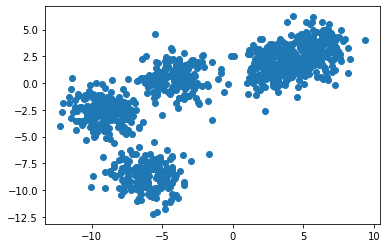

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1])

In [ ]:
import math
import numpy as np
import operator
def km(Xj,k,e):
  Cj=[] 
  mu=[]
  t=0
  for i in range (k):
    mu.append([0]*1)
  for n in range(k):
    ind=np.random.choice(Xj.shape[0]) #k случайные
    mu[n].append(Xj[ind])
  while True:
    for i in range (k):
     Cj.append([0]*1)

    t+=1  
    J=[]  
    for d in range(Xj.shape[0]):
      dist=[]
      for ii in range(k):
        dist.append(np.power(np.linalg.norm(Xj[d]-mu[ii][t]),2))#объект-центроид
      distance=np.argmin(dist)#к какому кластеру относится точка
      J.append(distance)#сохраняем в общий массив номеров кластеров
      
      Cj[distance].append(Xj[d])#сохраняем точки в кластере
  
    norma1=[]
    for sr in range(k):
      mu[sr].append(1/(len(Cj[sr]))*sum(Cj[sr]))#среднее арифметическое
      norma1.append(np.power(np.linalg.norm(mu[sr][t]-mu[sr][t-1]),2))
   
    #SSE
    sse=0
    norma2=[]
    for i in range(k):
      for cj in range(len(Cj[i])-1):
        norma2.append(np.power(np.linalg.norm(Cj[i][cj]-mu[i][t]),2))
      sse+=sum(norma2)
    #визуализация сходимости
    Cjx=np.zeros((k,Xj.shape[0]))#для хранения координаты x
    Cjy=np.zeros((k,Xj.shape[0]))#для хранения координаты y
    for i in range(k):
     
      for j in range(len(Cj[i])-1):
       
       Cjx[i][j]=Cj[i][j+1][0]
       Cjy[i][j]=Cj[i][j+1][1]
    for klaster in range(k):
      print(t,'итерация')
      plt.scatter(Cjx,Cjy,c='b')#точки кластера
      plt.scatter(mu[klaster][t][0],mu[klaster][t][1],c='r')#центроид
      plt.show()   
    if (sum(norma1)<=e):break;
    else:
      Cj.clear()
      norma1.clear()
      norma2.clear()
      dist.clear()    
      
  return sse,J


1 итерация


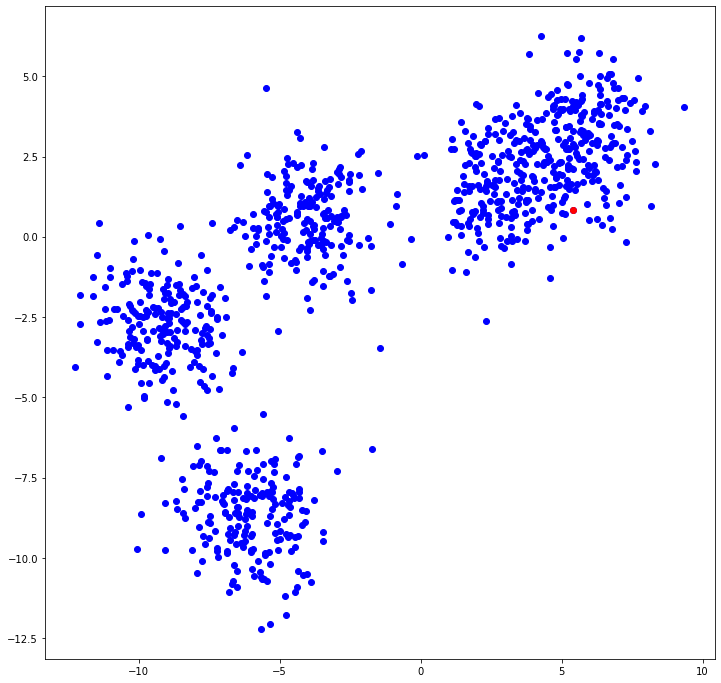

2 итерация


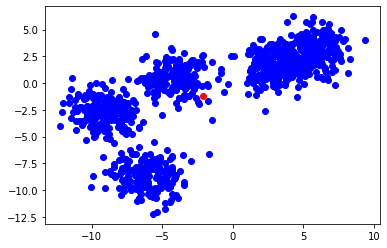

3 итерация


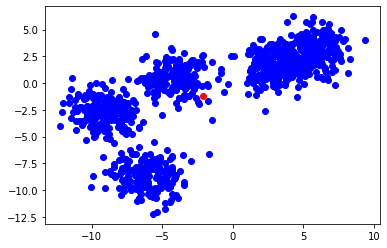

SSE= 51614.105083890834


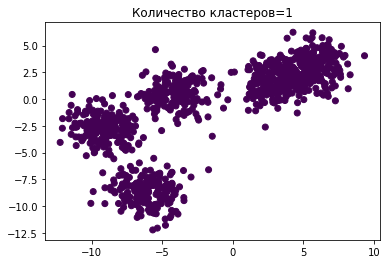

1 итерация


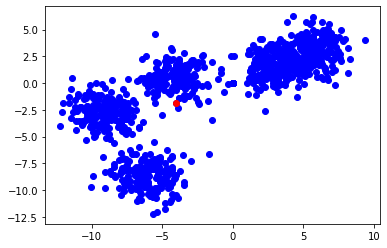

1 итерация


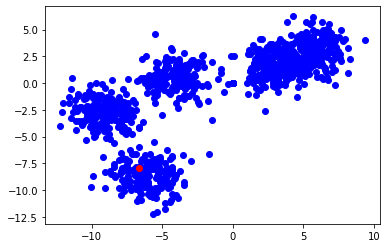

2 итерация


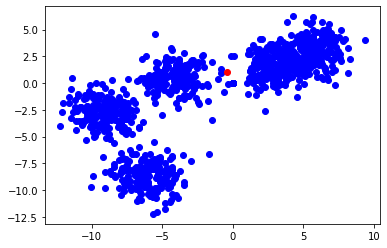

2 итерация


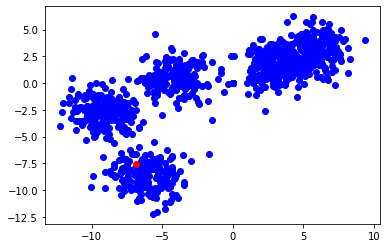

3 итерация


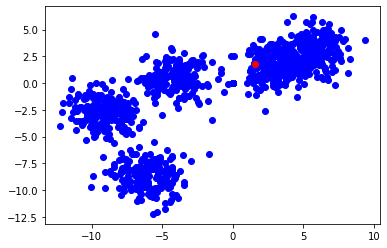

3 итерация


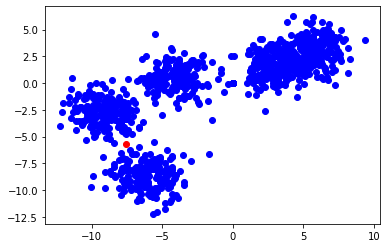

4 итерация


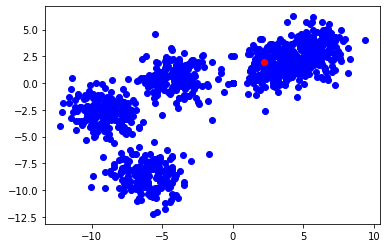

4 итерация


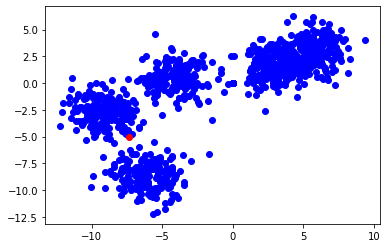

5 итерация


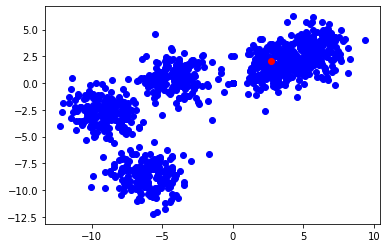

5 итерация


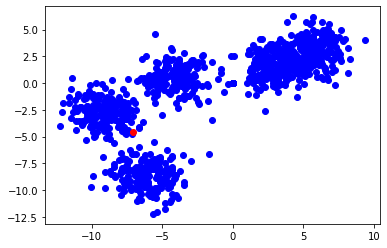

6 итерация


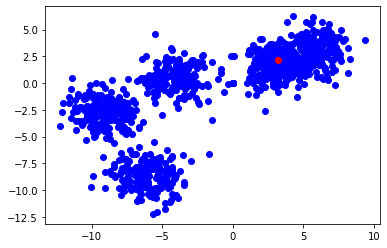

6 итерация


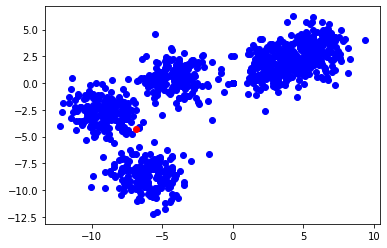

7 итерация


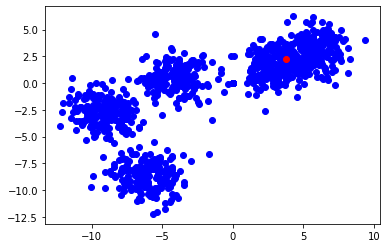

7 итерация


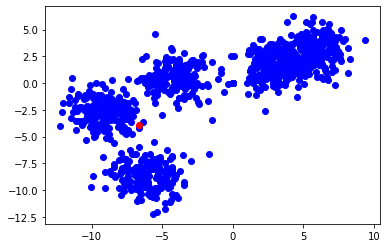

8 итерация


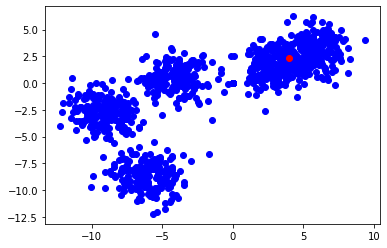

8 итерация


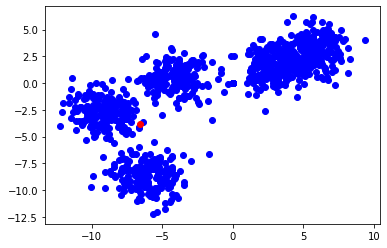

9 итерация


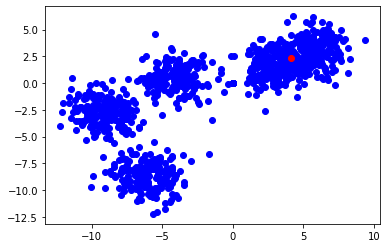

9 итерация


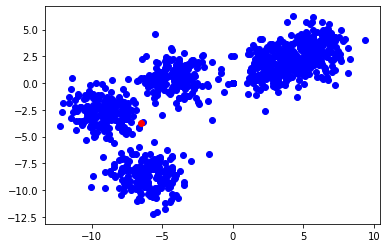

SSE= 17920.10071765534


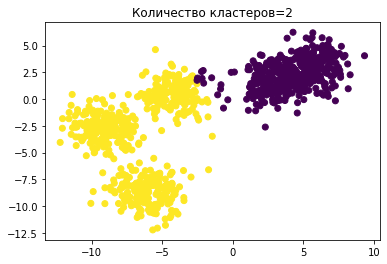

1 итерация


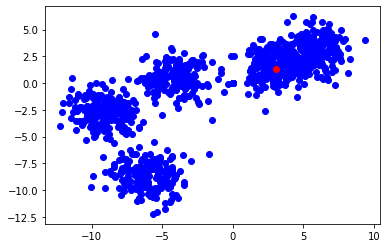

1 итерация


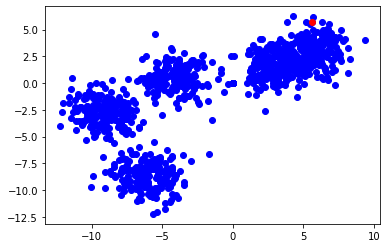

1 итерация


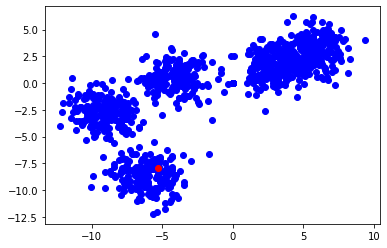

2 итерация


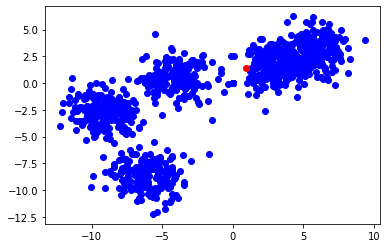

2 итерация


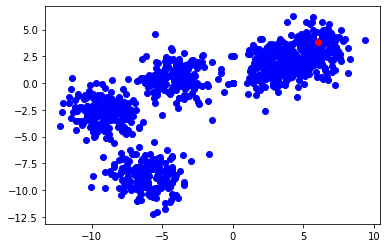

2 итерация


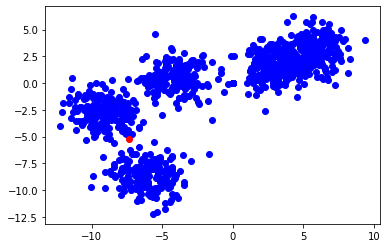

3 итерация


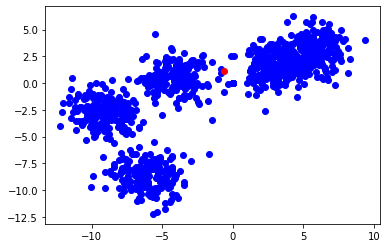

3 итерация


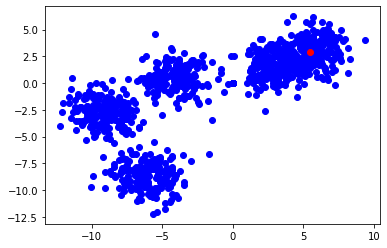

3 итерация


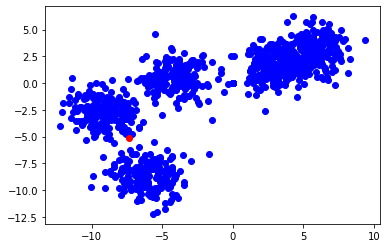

4 итерация


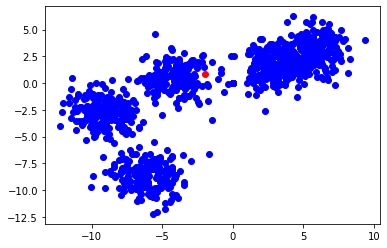

4 итерация


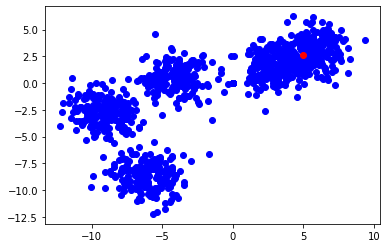

4 итерация


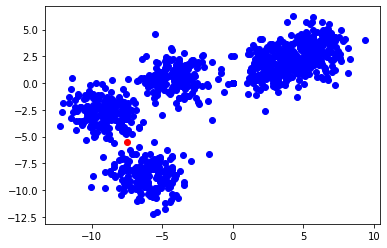

5 итерация


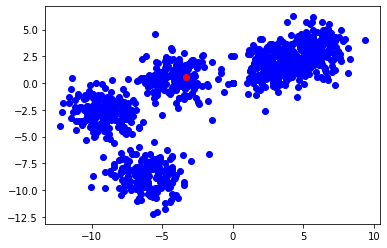

5 итерация


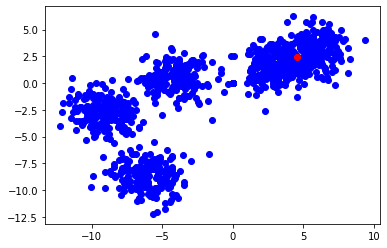

5 итерация


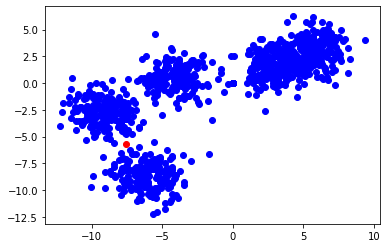

6 итерация


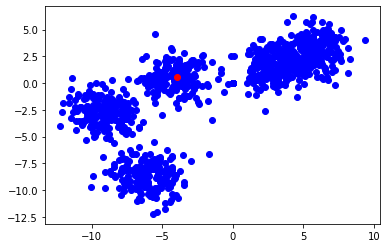

6 итерация


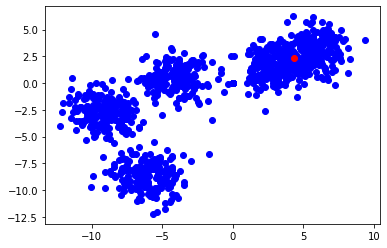

6 итерация


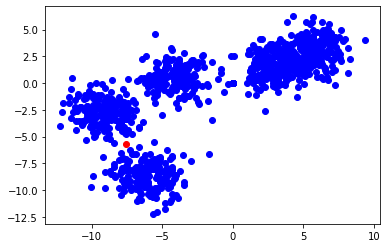

7 итерация


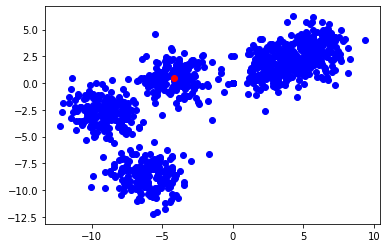

7 итерация


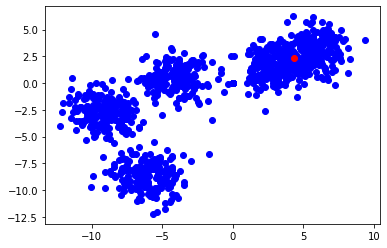

7 итерация


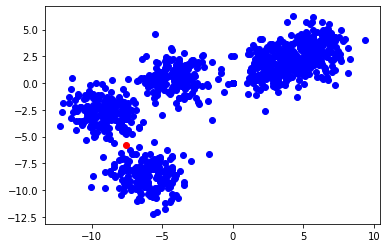

8 итерация


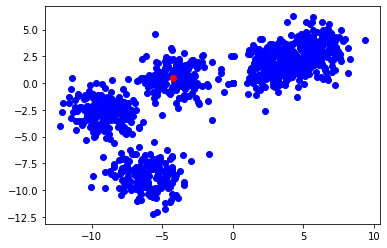

8 итерация


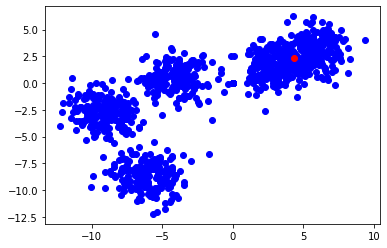

8 итерация


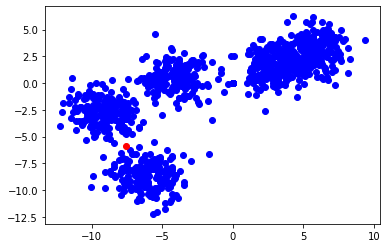

SSE= 12562.889891034378


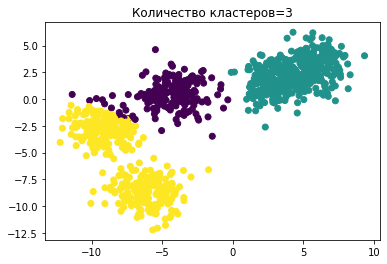

1 итерация


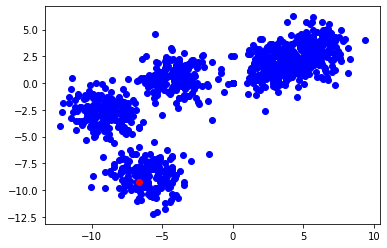

1 итерация


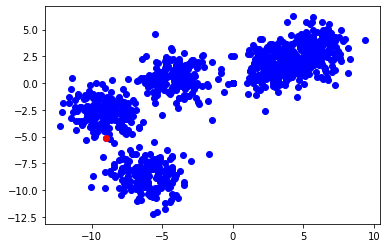

1 итерация


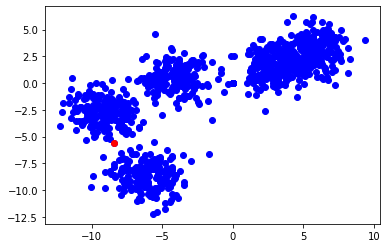

1 итерация


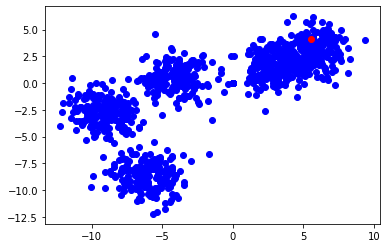

2 итерация


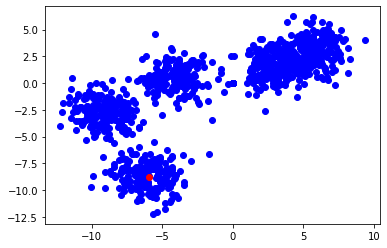

2 итерация


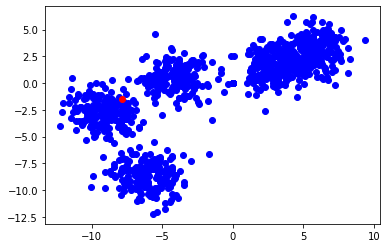

2 итерация


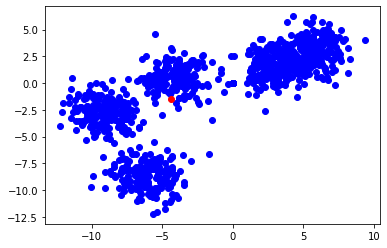

2 итерация


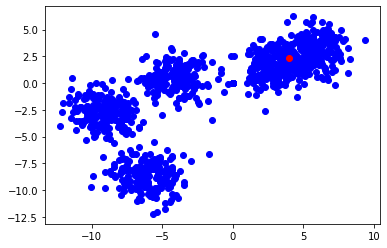

3 итерация


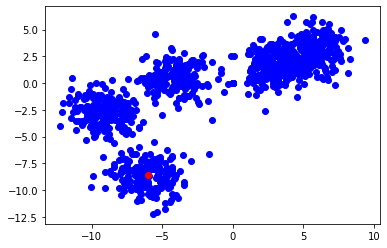

3 итерация


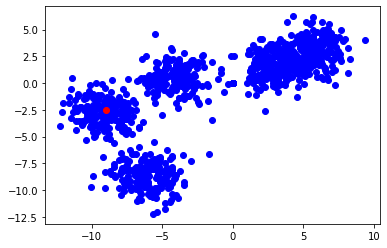

3 итерация


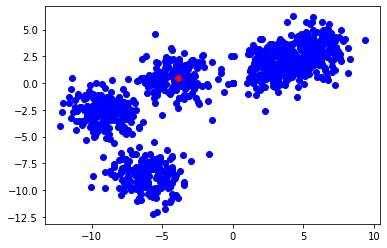

3 итерация


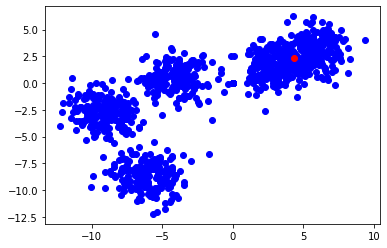

4 итерация


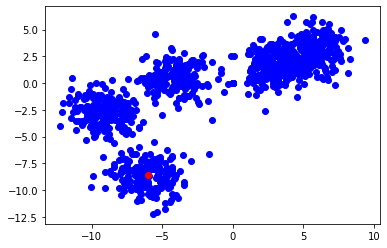

4 итерация


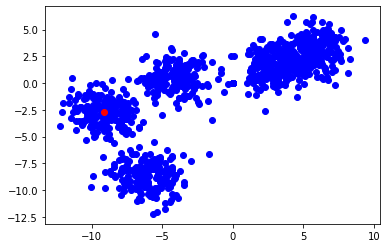

4 итерация


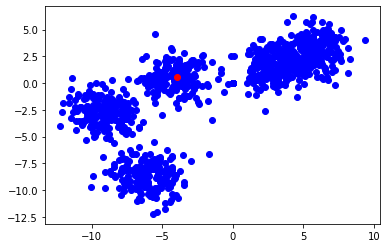

4 итерация


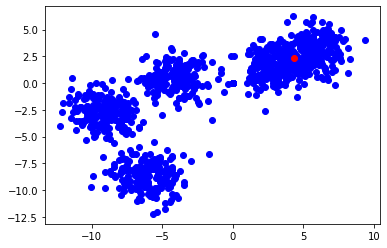

SSE= 8413.322253026156


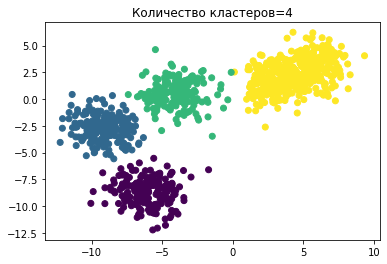

1 итерация


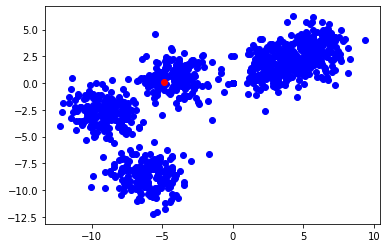

1 итерация


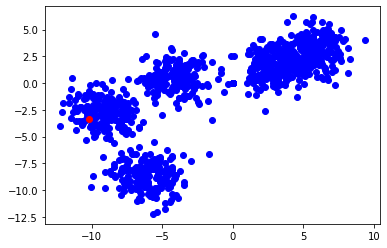

1 итерация


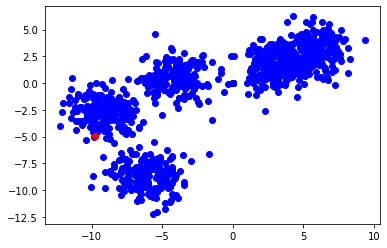

1 итерация


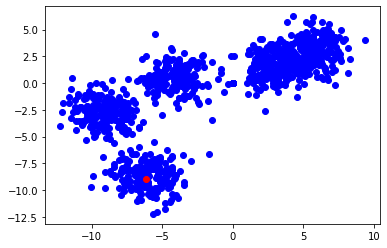

1 итерация


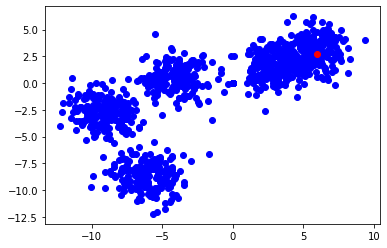

2 итерация


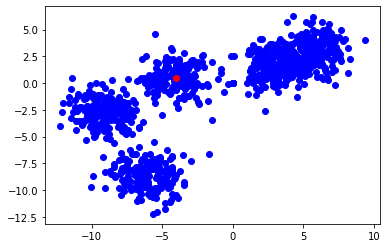

2 итерация


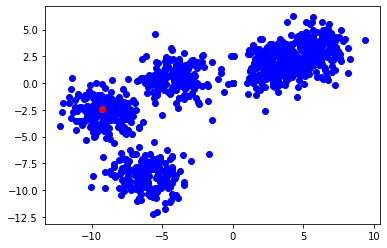

2 итерация


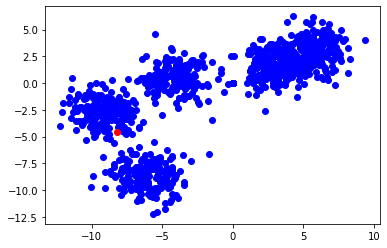

2 итерация


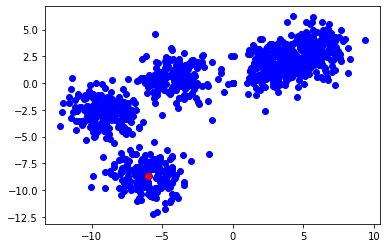

2 итерация


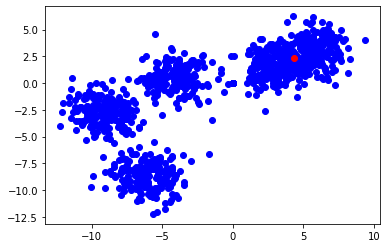

3 итерация


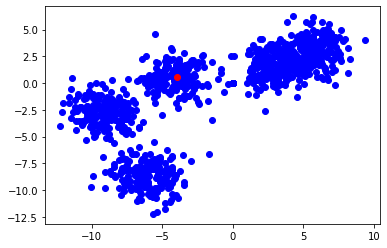

3 итерация


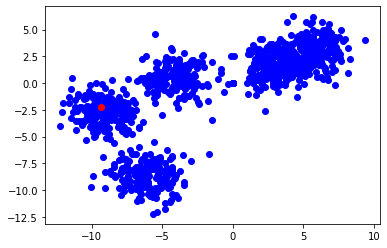

3 итерация


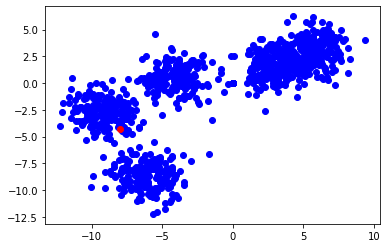

3 итерация


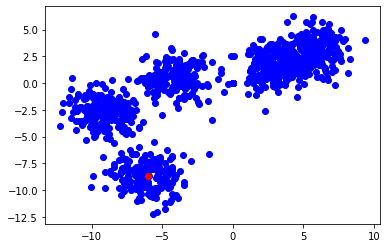

3 итерация


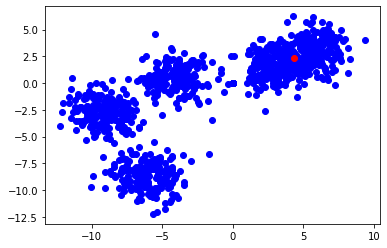

4 итерация


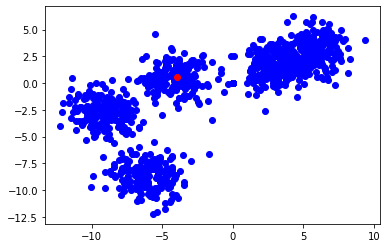

4 итерация


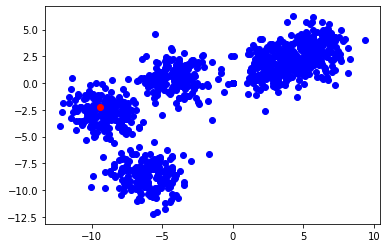

4 итерация


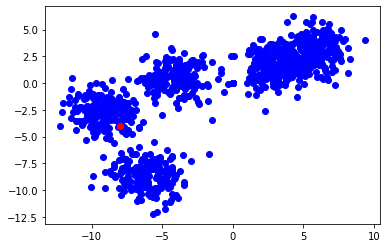

4 итерация


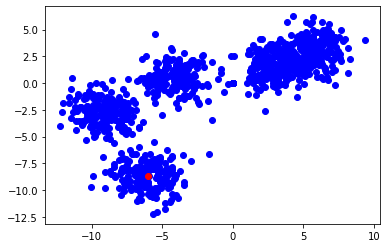

4 итерация


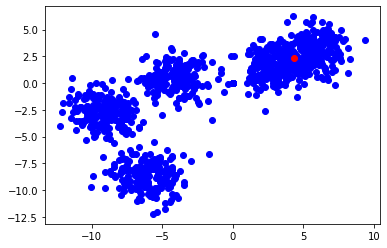

5 итерация


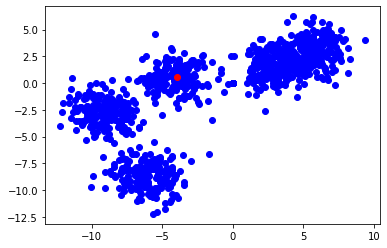

5 итерация


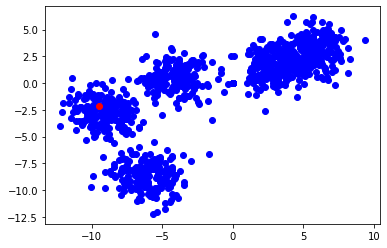

5 итерация


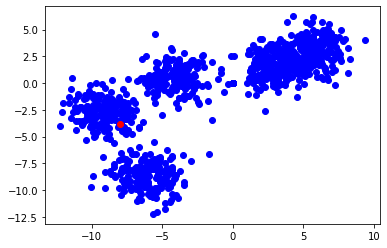

5 итерация


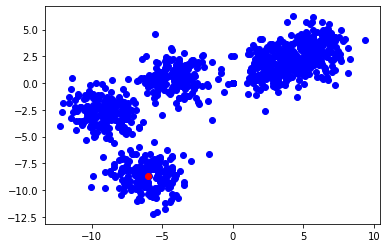

5 итерация


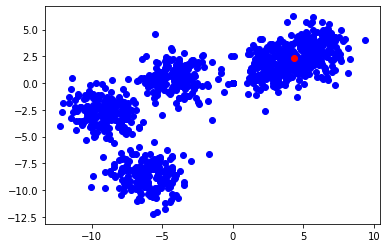

SSE= 8749.54861642851


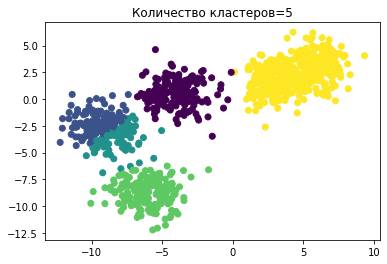

1 итерация


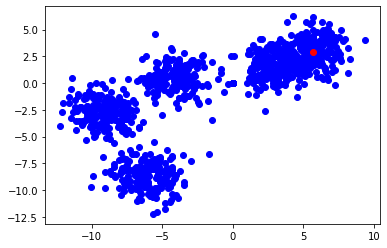

1 итерация


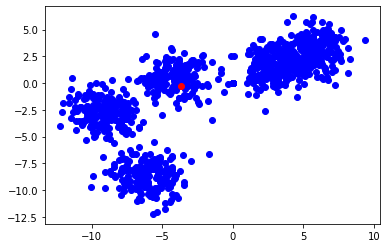

1 итерация


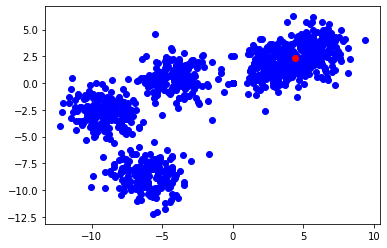

1 итерация


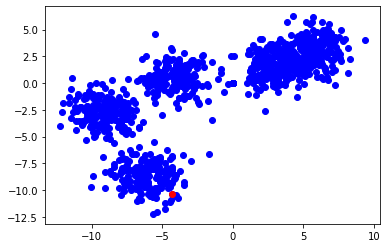

1 итерация


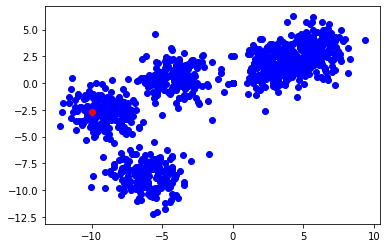

1 итерация


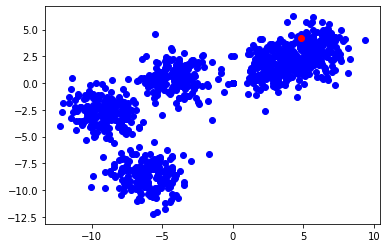

2 итерация


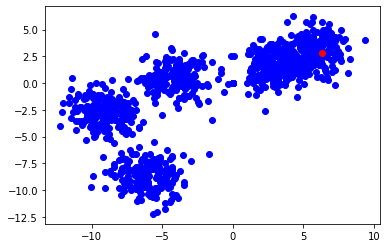

2 итерация


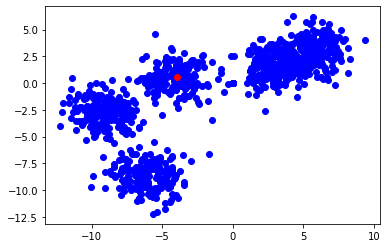

2 итерация


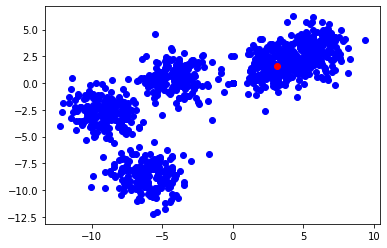

2 итерация


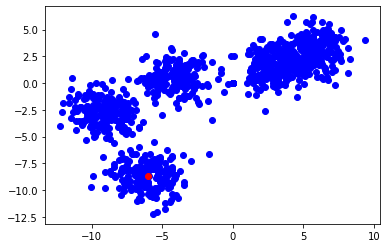

2 итерация


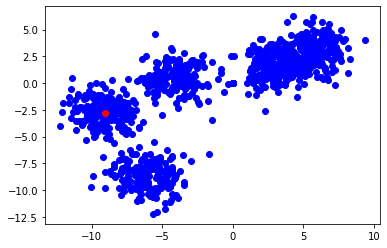

2 итерация


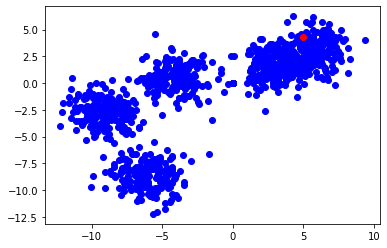

3 итерация


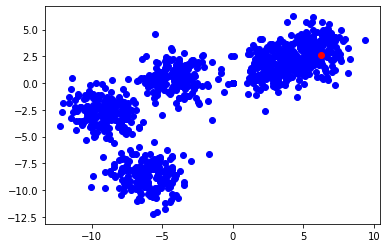

3 итерация


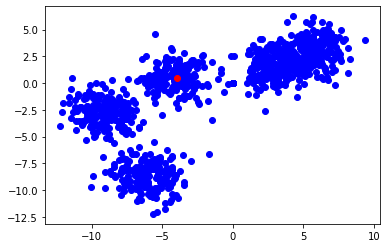

3 итерация


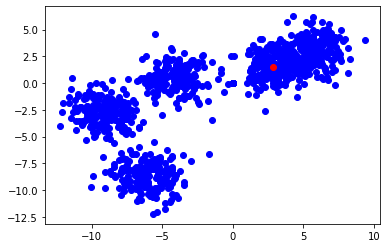

3 итерация


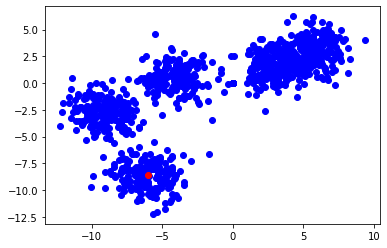

3 итерация


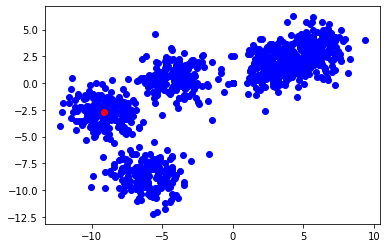

3 итерация


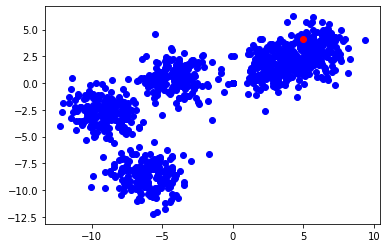

4 итерация


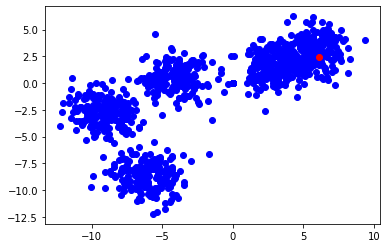

4 итерация


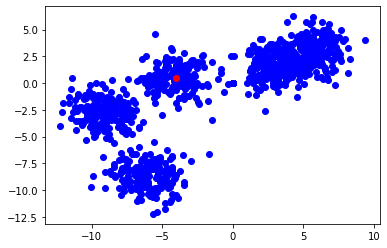

4 итерация


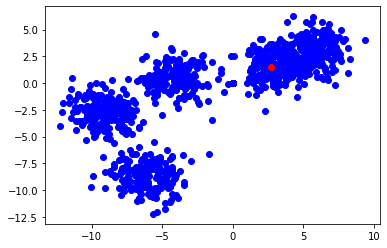

4 итерация


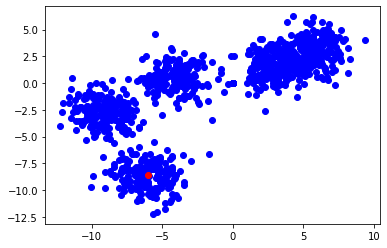

4 итерация


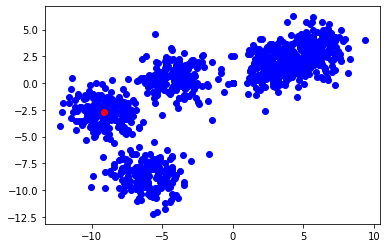

4 итерация


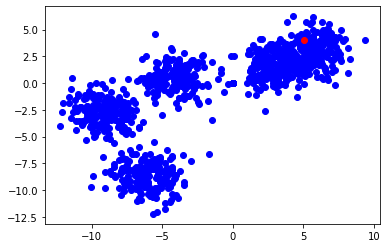

5 итерация


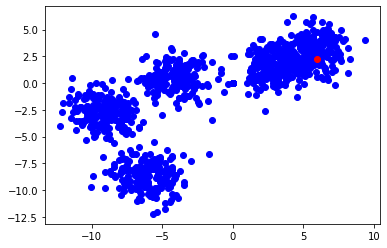

5 итерация


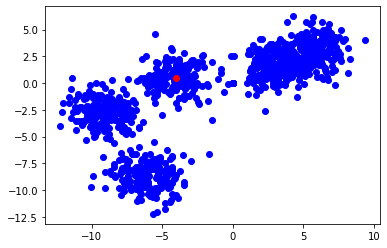

5 итерация


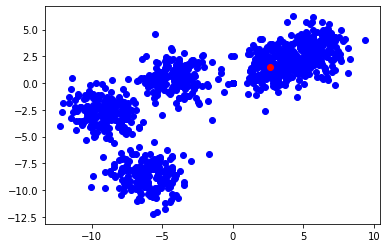

5 итерация


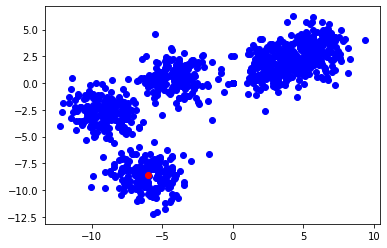

5 итерация


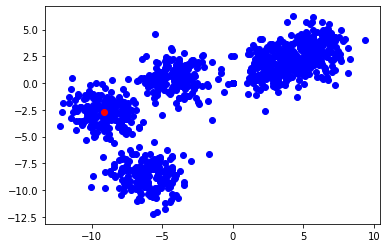

5 итерация


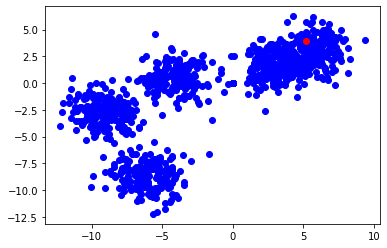

6 итерация


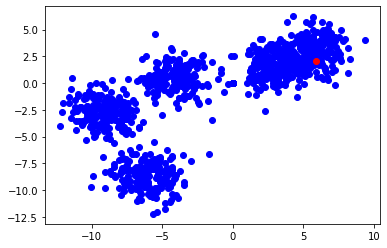

6 итерация


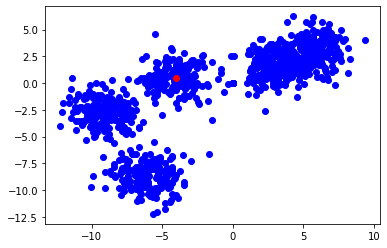

6 итерация


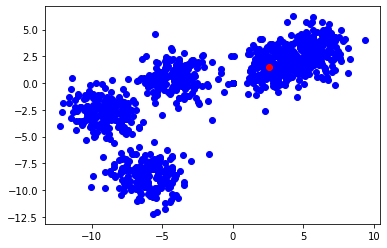

6 итерация


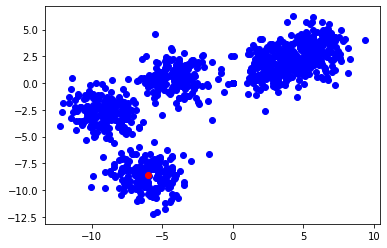

6 итерация


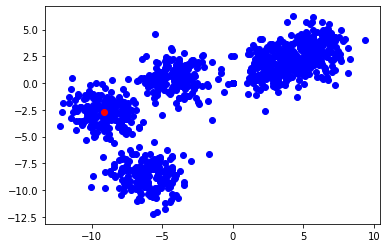

6 итерация


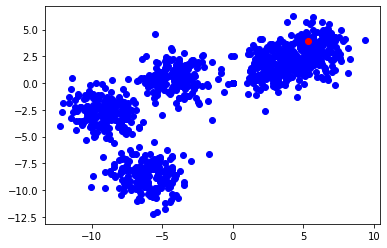

7 итерация


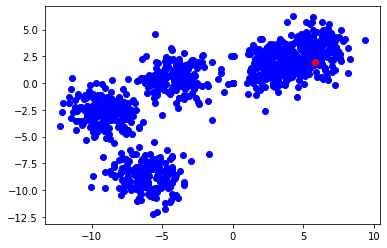

7 итерация


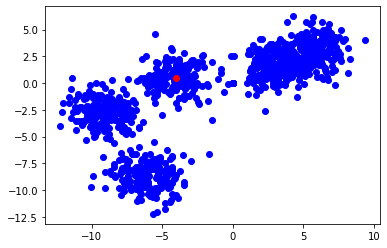

7 итерация


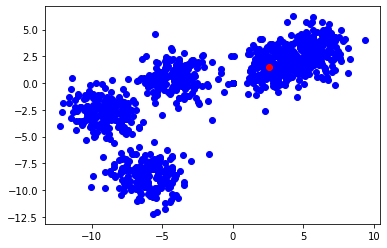

7 итерация


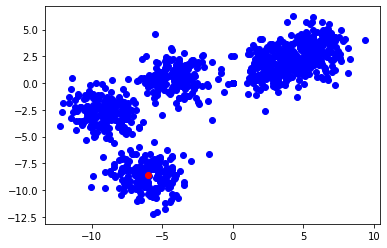

7 итерация


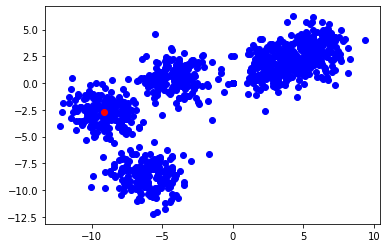

7 итерация


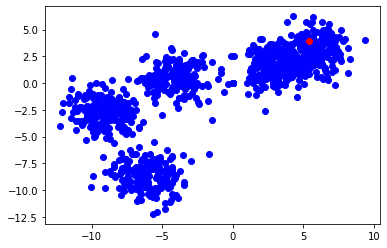

SSE= 9650.088577929868


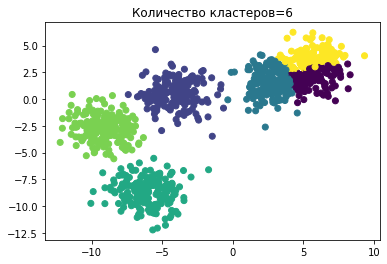

1 итерация


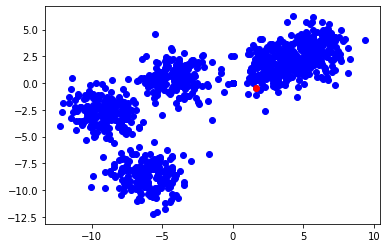

1 итерация


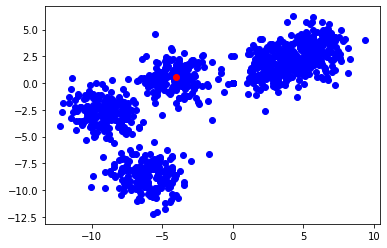

1 итерация


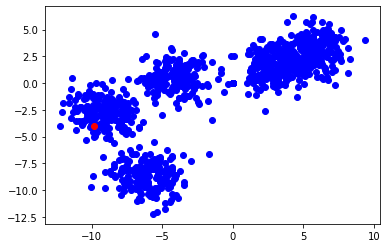

1 итерация


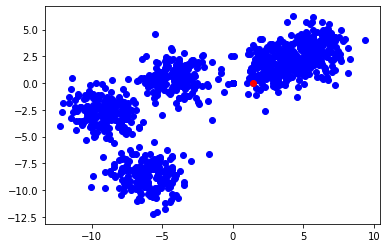

1 итерация


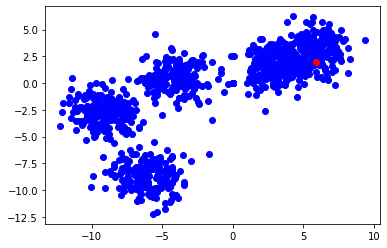

1 итерация


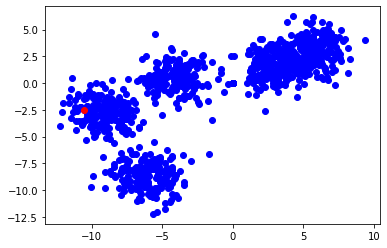

1 итерация


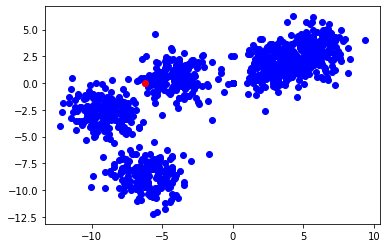

2 итерация


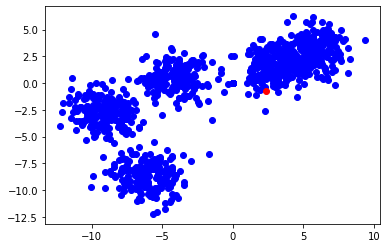

2 итерация


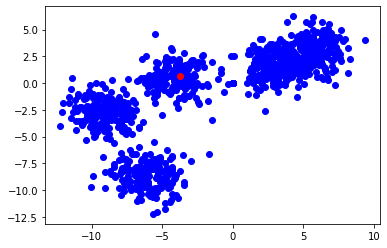

2 итерация


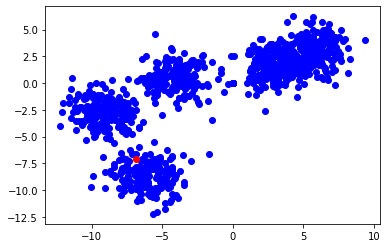

2 итерация


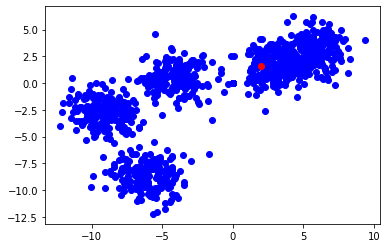

2 итерация


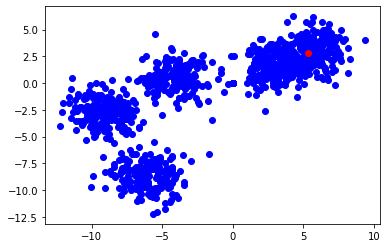

2 итерация


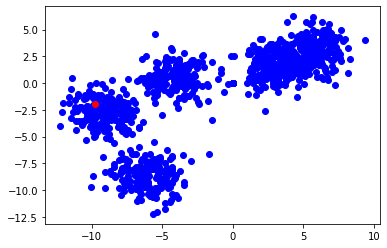

2 итерация


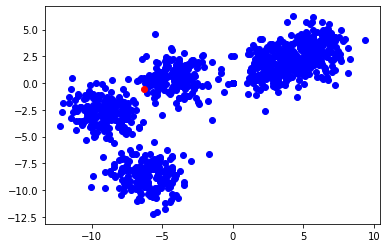

3 итерация


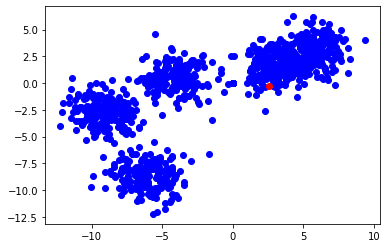

3 итерация


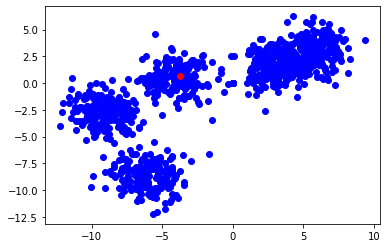

3 итерация


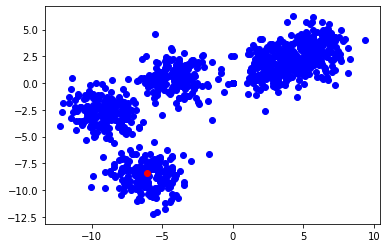

3 итерация


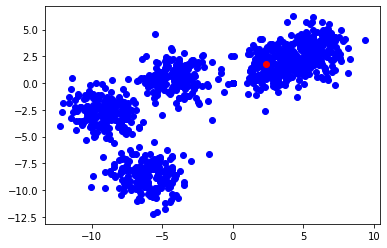

3 итерация


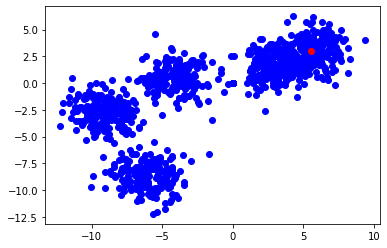

3 итерация


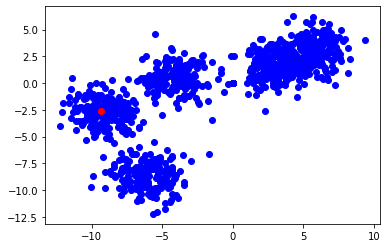

3 итерация


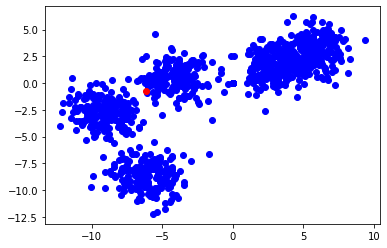

4 итерация


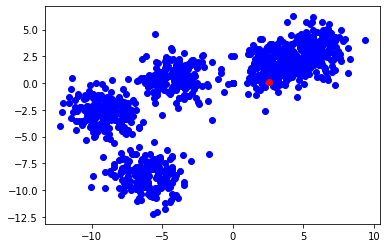

4 итерация


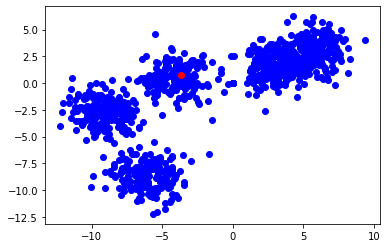

4 итерация


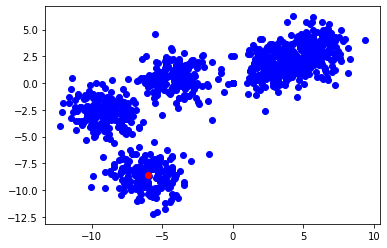

4 итерация


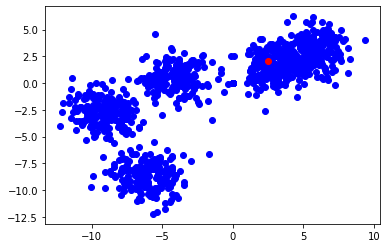

4 итерация


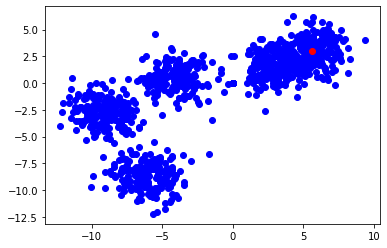

4 итерация


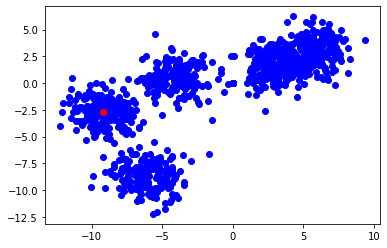

4 итерация


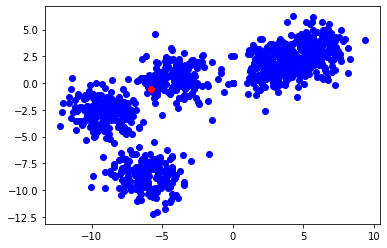

5 итерация


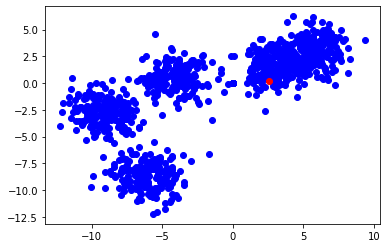

5 итерация


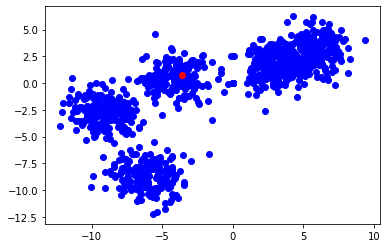

5 итерация


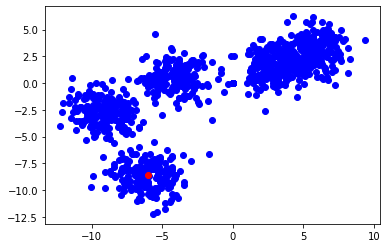

5 итерация


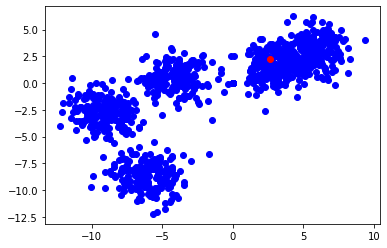

5 итерация


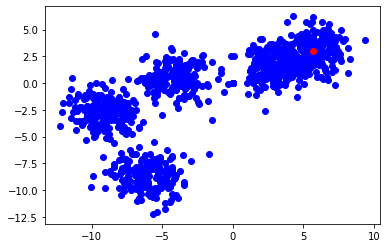

5 итерация


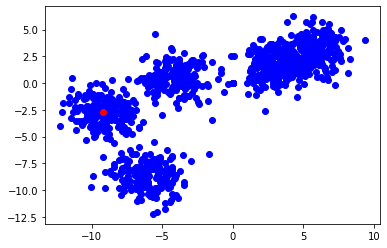

5 итерация


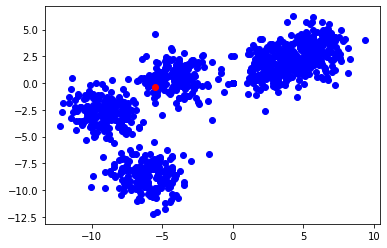

6 итерация


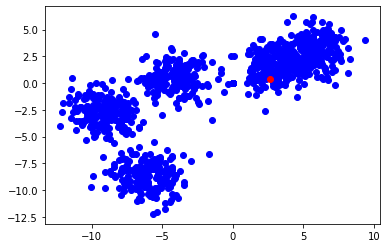

6 итерация


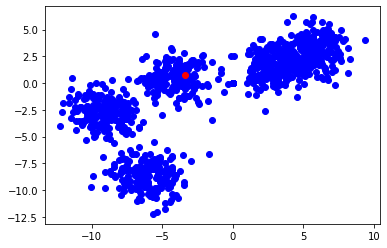

6 итерация


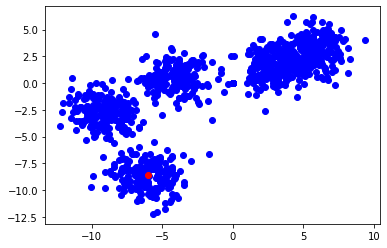

6 итерация


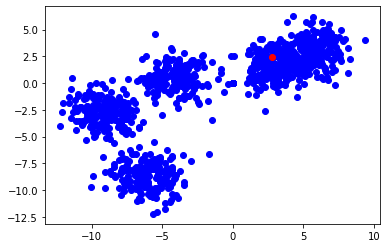

6 итерация


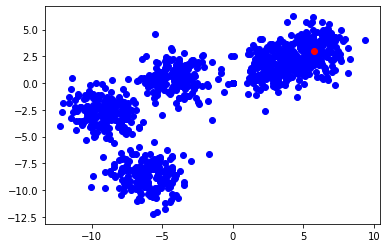

6 итерация


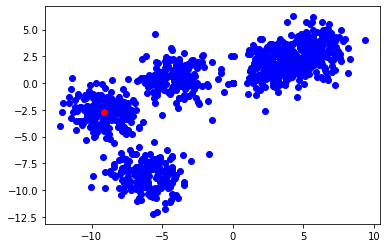

6 итерация


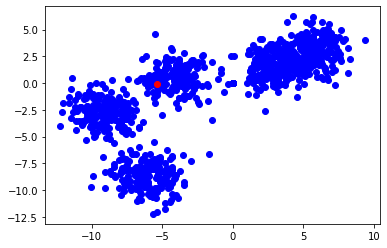

7 итерация


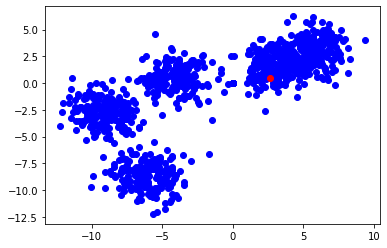

7 итерация


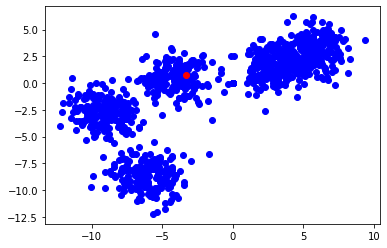

7 итерация


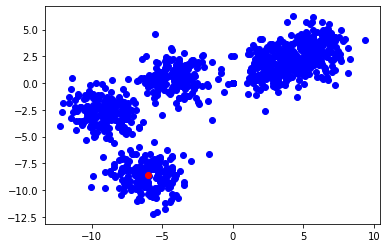

7 итерация


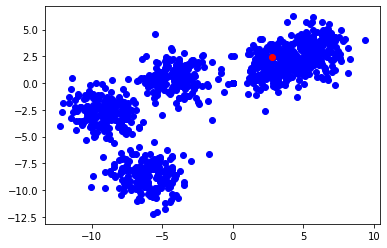

7 итерация


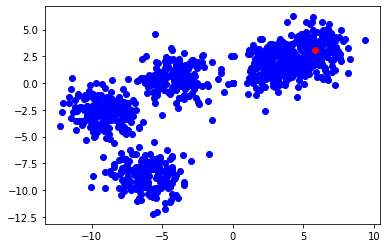

7 итерация


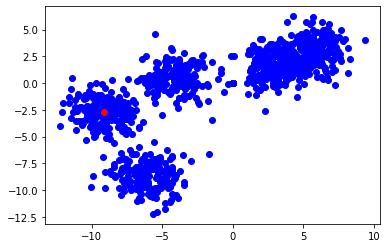

7 итерация


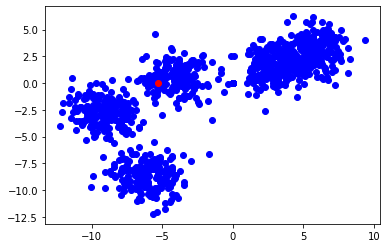

SSE= 10409.528636635234


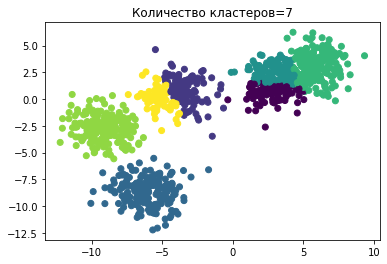

1 итерация


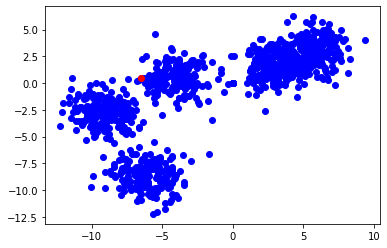

1 итерация


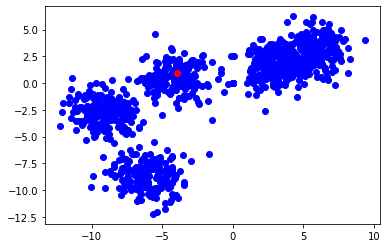

1 итерация


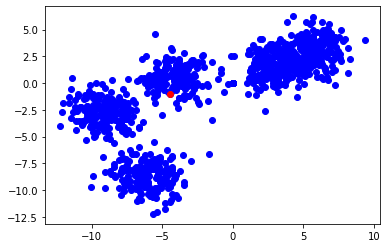

1 итерация


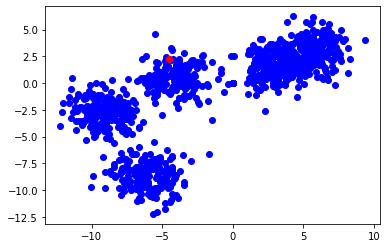

1 итерация


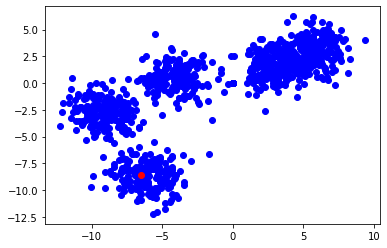

1 итерация


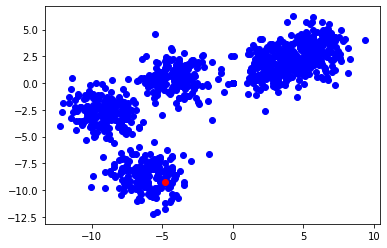

1 итерация


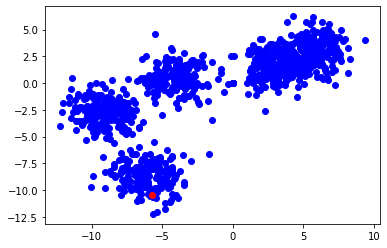

1 итерация


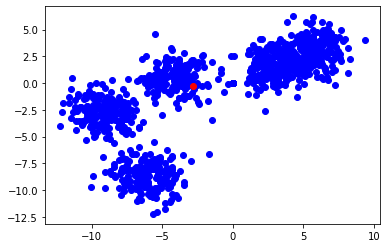

2 итерация


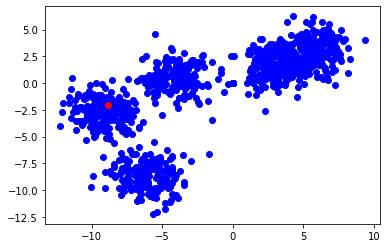

2 итерация


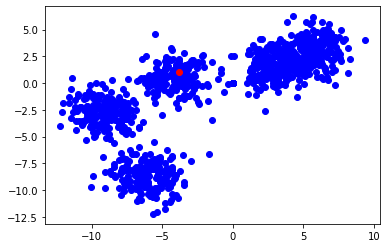

2 итерация


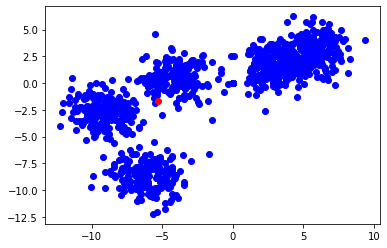

2 итерация


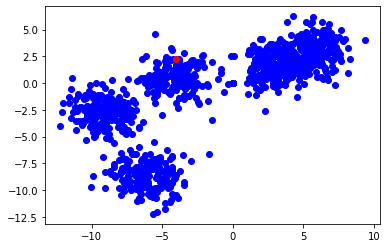

2 итерация


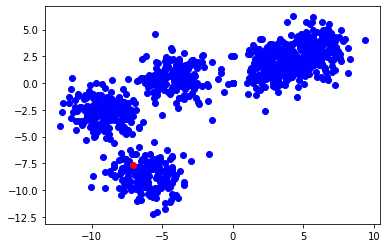

2 итерация


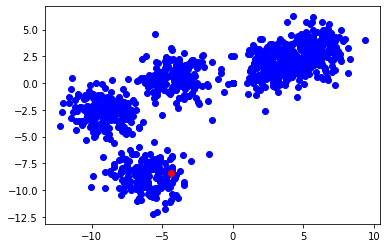

2 итерация


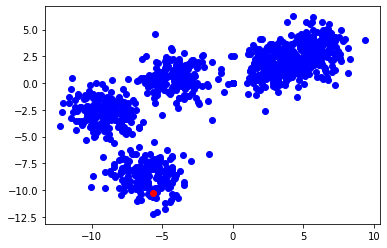

2 итерация


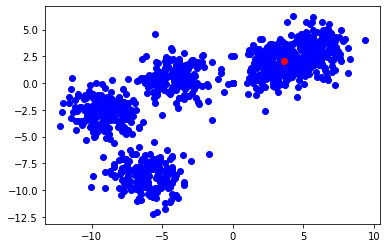

3 итерация


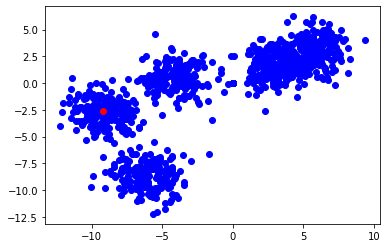

3 итерация


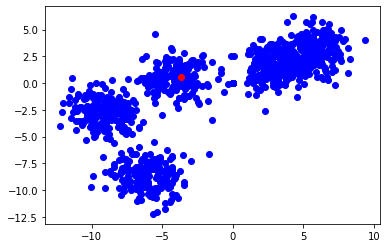

3 итерация


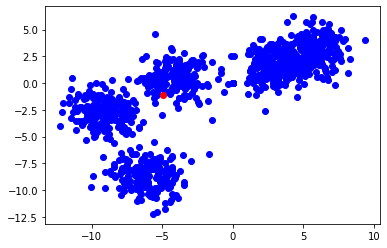

3 итерация


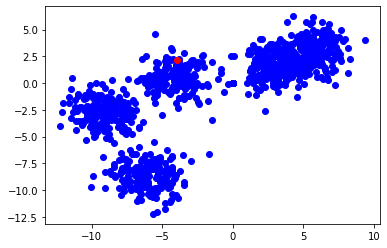

3 итерация


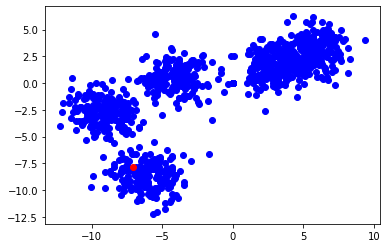

3 итерация


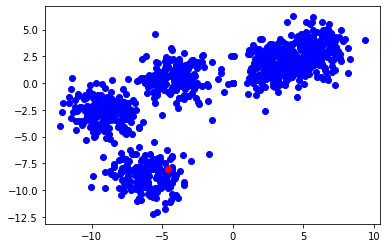

3 итерация


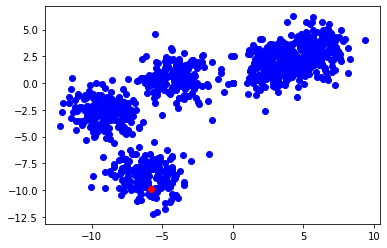

3 итерация


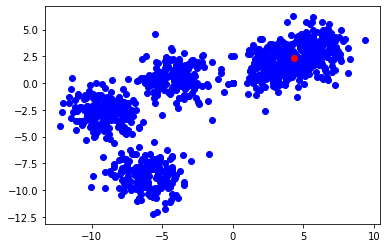

4 итерация


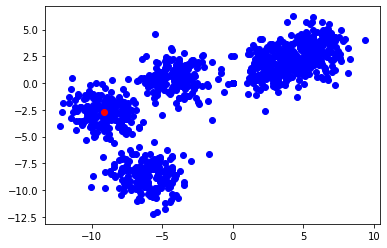

4 итерация


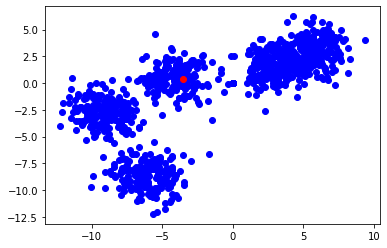

4 итерация


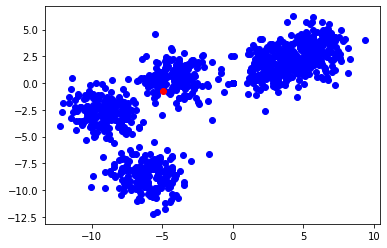

4 итерация


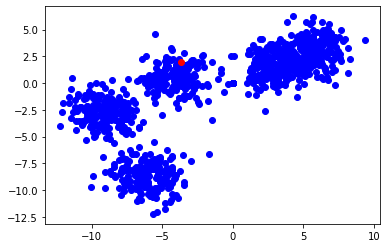

4 итерация


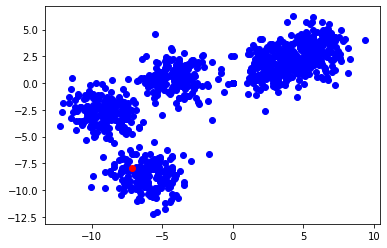

4 итерация


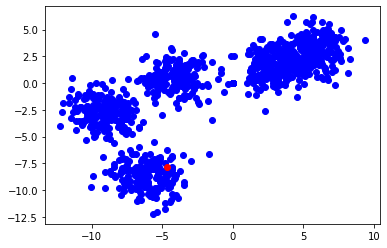

4 итерация


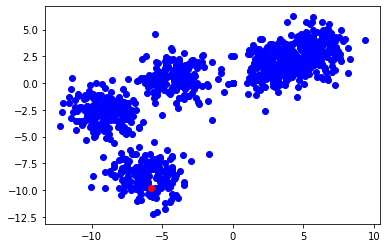

4 итерация


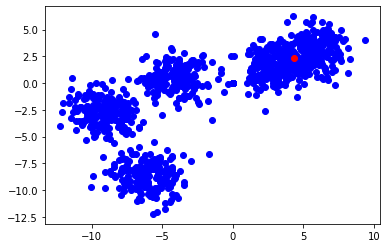

5 итерация


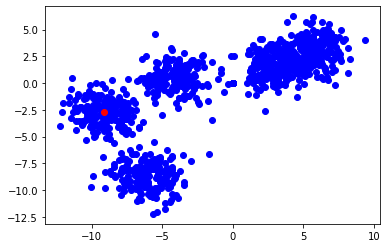

5 итерация


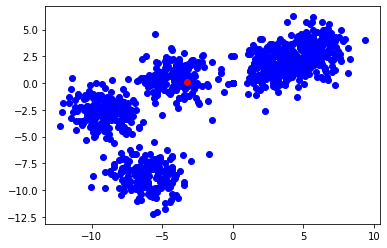

5 итерация


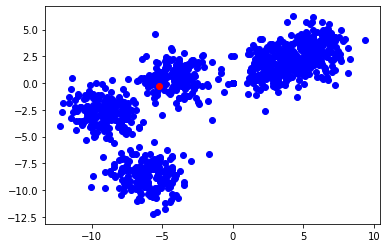

5 итерация


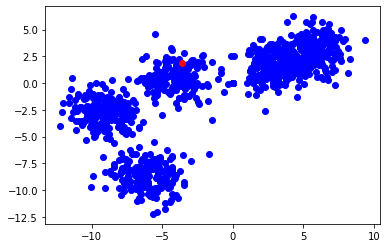

5 итерация


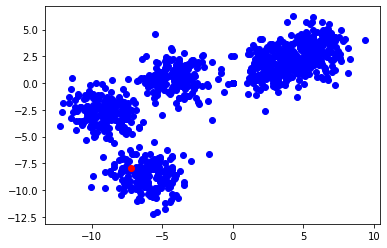

5 итерация


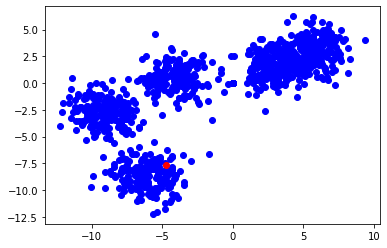

5 итерация


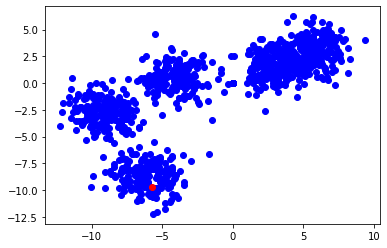

5 итерация


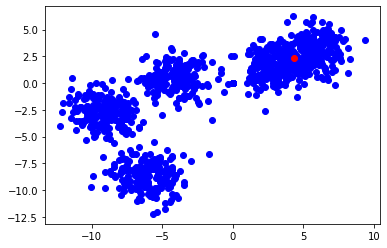

6 итерация


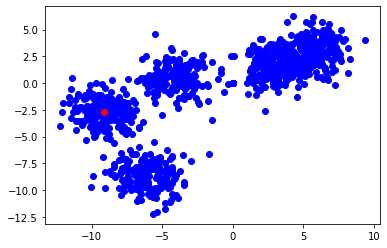

6 итерация


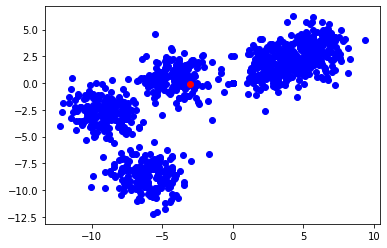

6 итерация


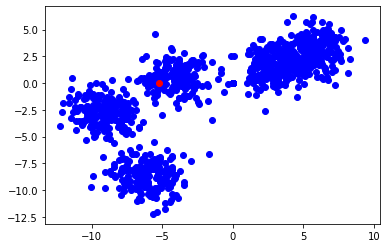

6 итерация


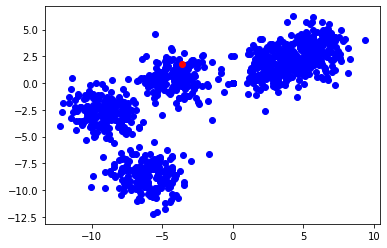

6 итерация


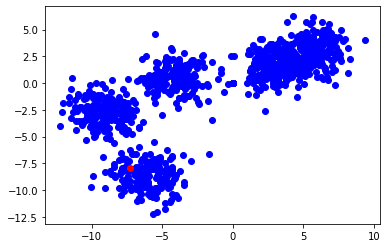

6 итерация


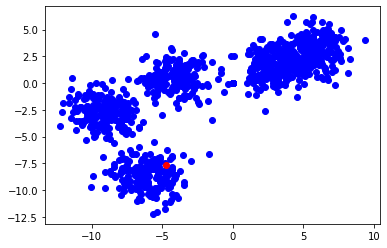

6 итерация


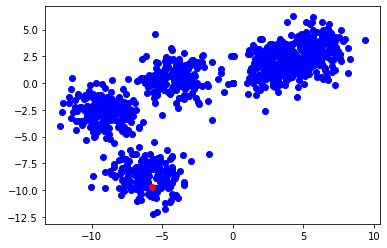

6 итерация


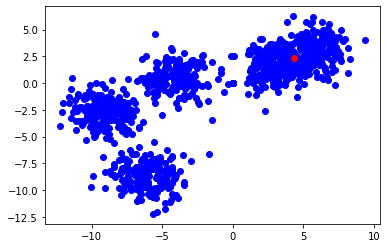

7 итерация


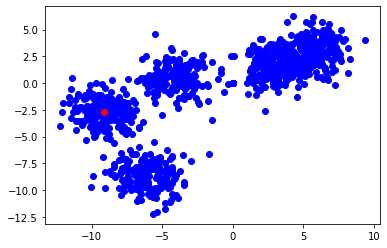

7 итерация


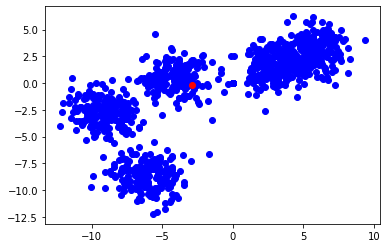

7 итерация


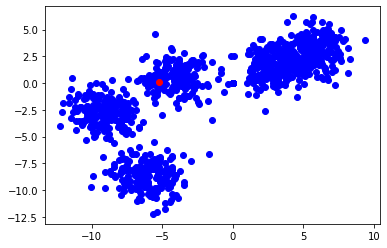

7 итерация


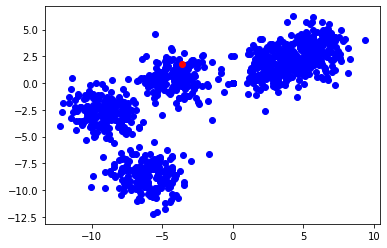

7 итерация


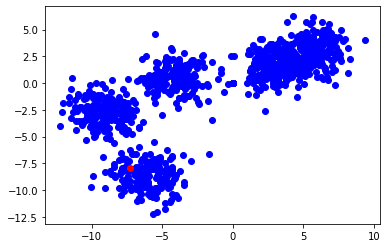

7 итерация


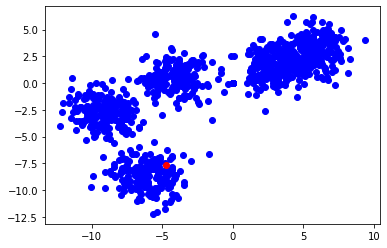

7 итерация


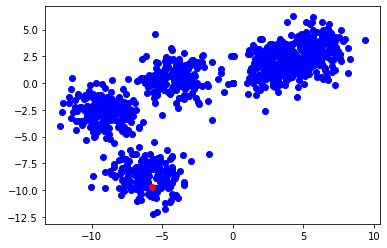

7 итерация


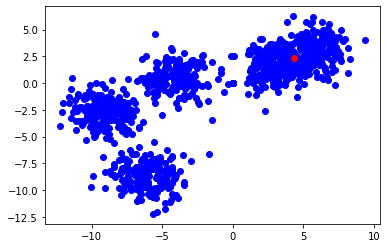

SSE= 11255.329696229888


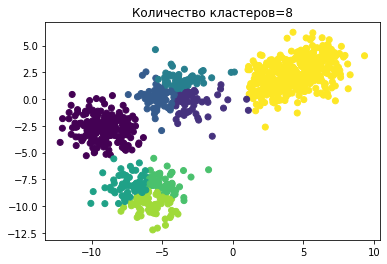

1 итерация


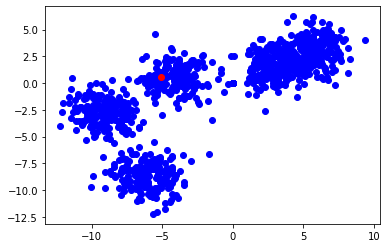

1 итерация


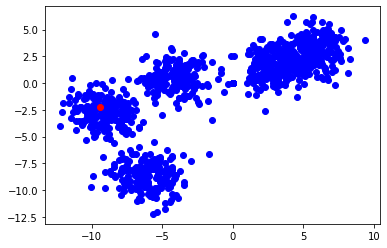

1 итерация


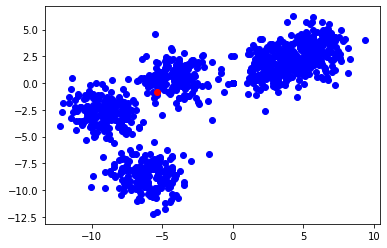

1 итерация


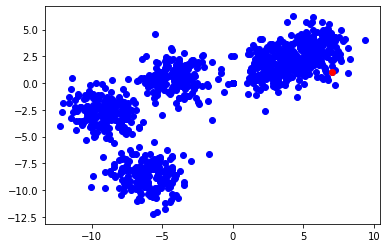

1 итерация


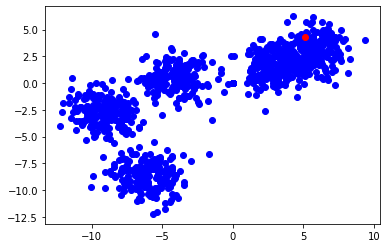

1 итерация


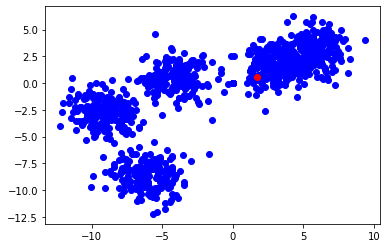

1 итерация


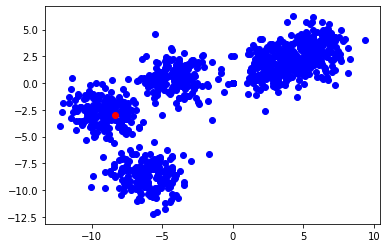

1 итерация


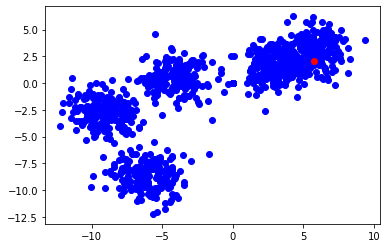

1 итерация


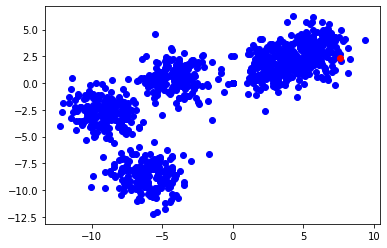

2 итерация


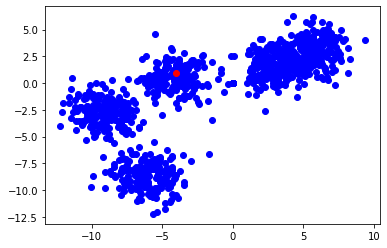

2 итерация


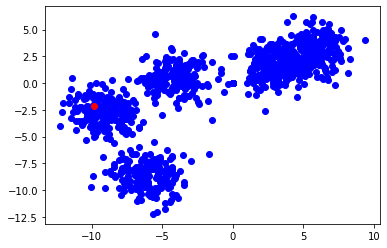

2 итерация


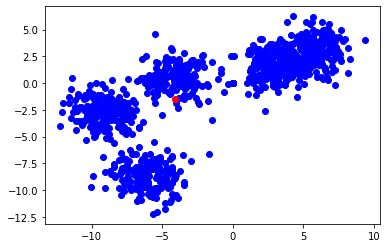

2 итерация


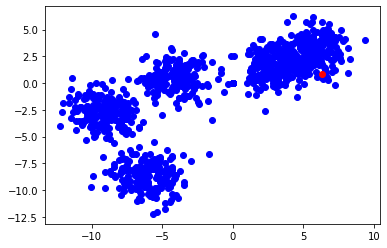

2 итерация


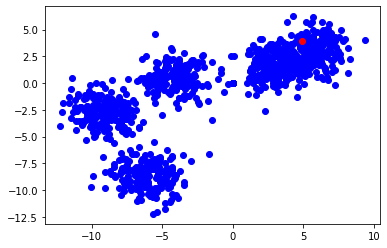

2 итерация


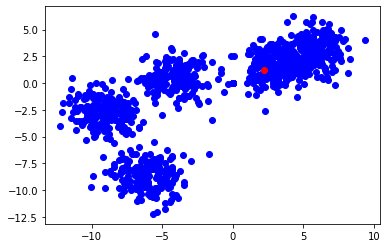

2 итерация


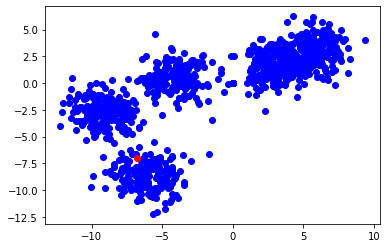

2 итерация


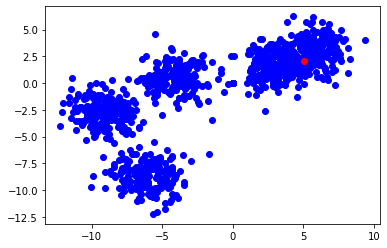

2 итерация


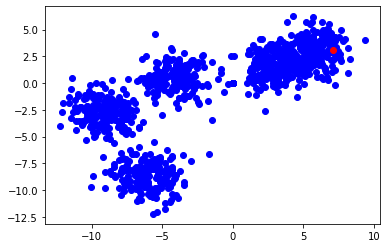

3 итерация


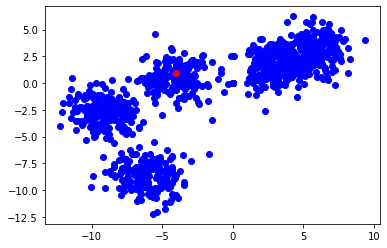

3 итерация


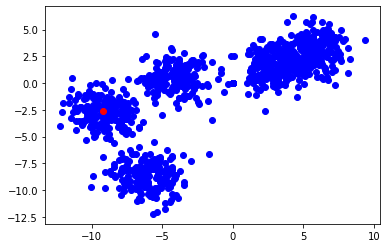

3 итерация


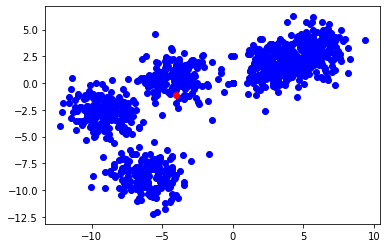

3 итерация


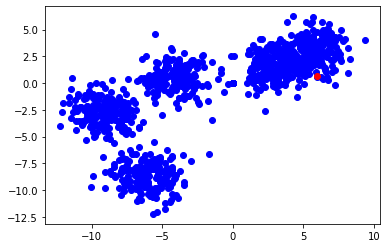

3 итерация


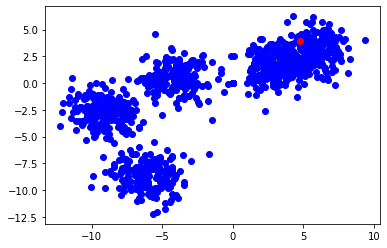

3 итерация


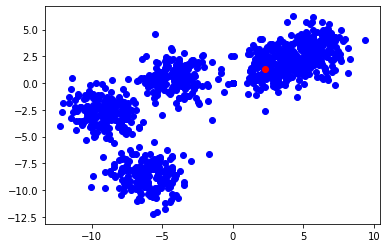

3 итерация


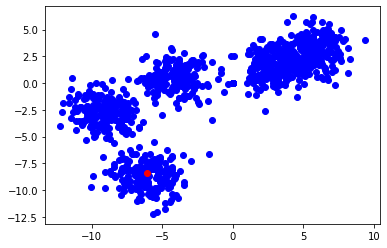

3 итерация


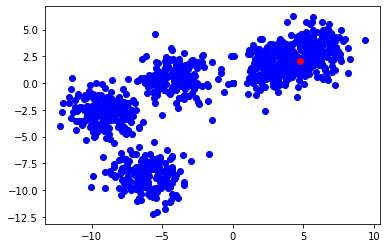

3 итерация


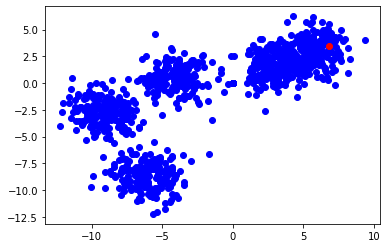

4 итерация


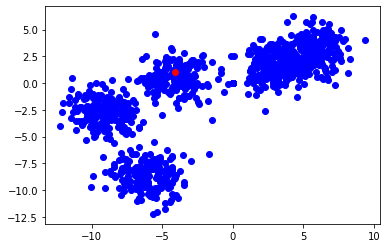

4 итерация


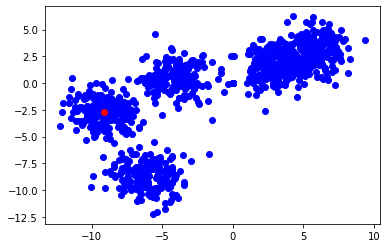

4 итерация


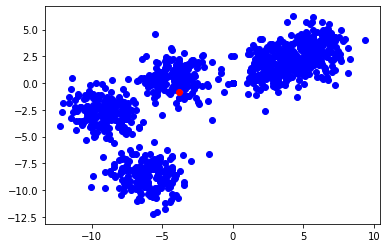

4 итерация


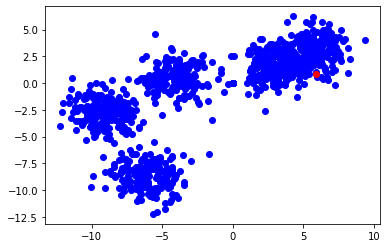

4 итерация


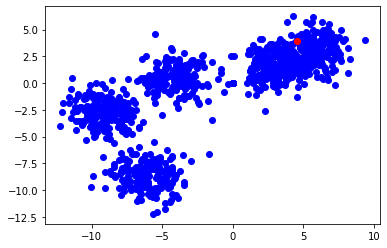

4 итерация


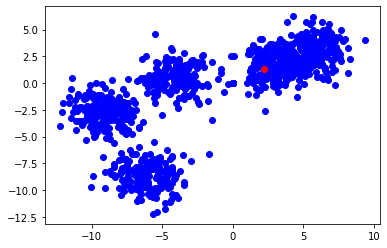

4 итерация


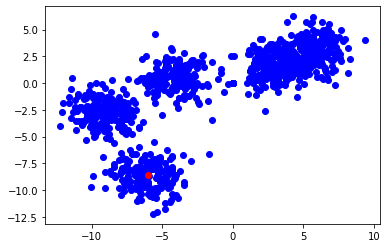

4 итерация


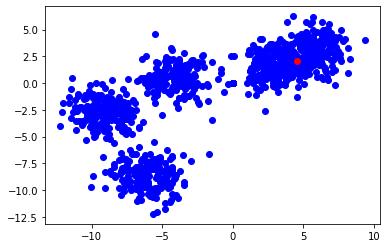

4 итерация


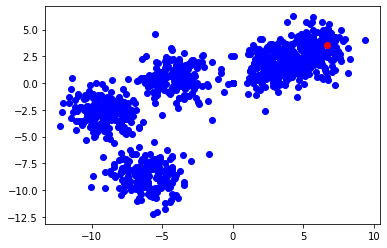

5 итерация


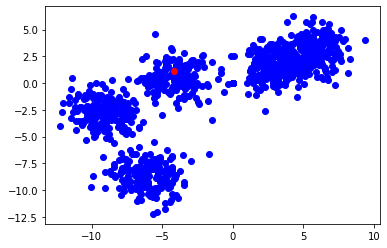

5 итерация


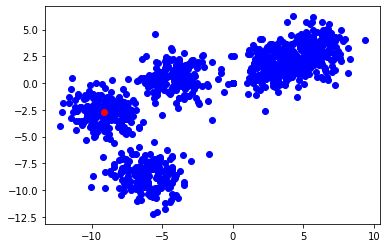

5 итерация


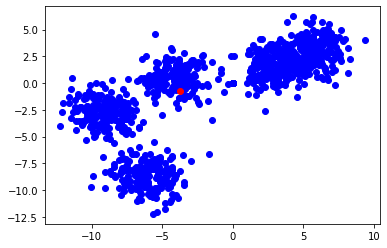

5 итерация


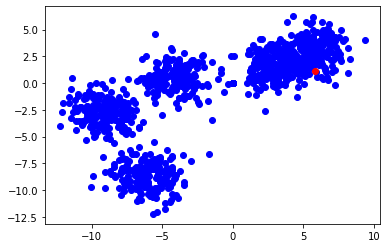

5 итерация


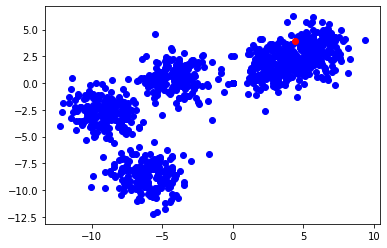

5 итерация


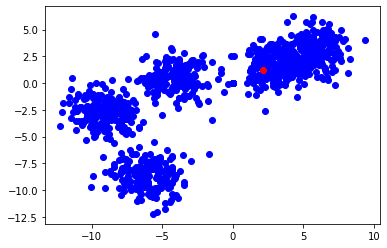

5 итерация


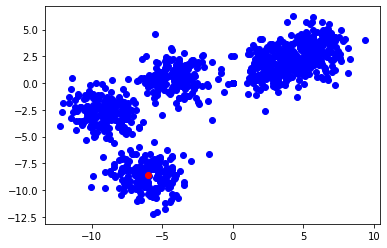

5 итерация


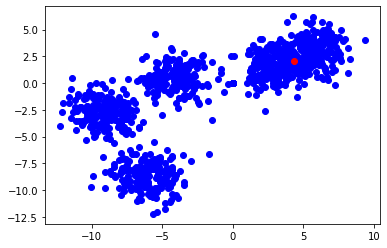

5 итерация


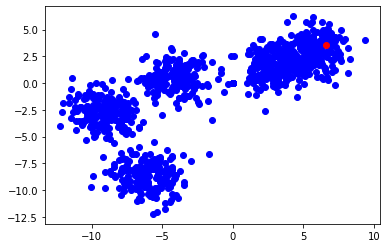

6 итерация


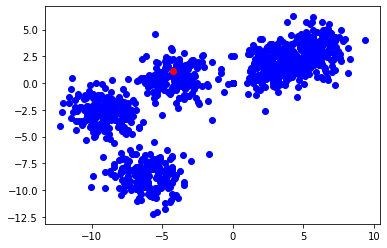

6 итерация


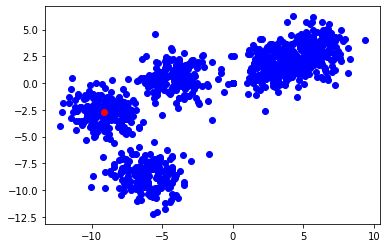

6 итерация


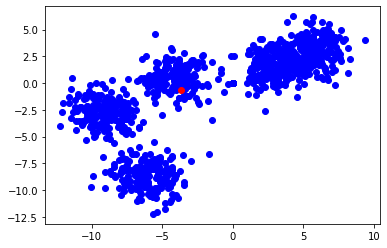

6 итерация


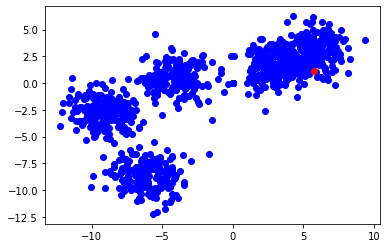

6 итерация


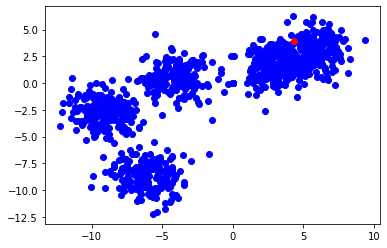

6 итерация


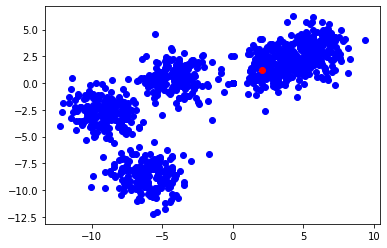

6 итерация


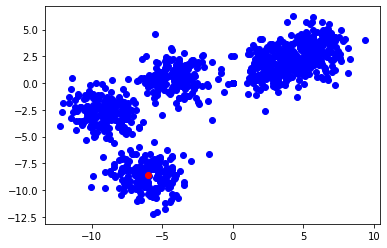

6 итерация


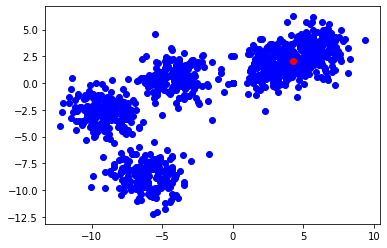

6 итерация


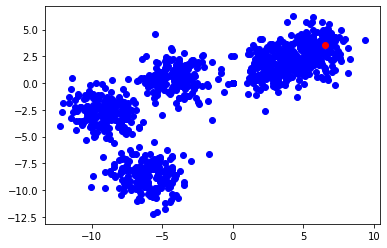

SSE= 13383.37803249921


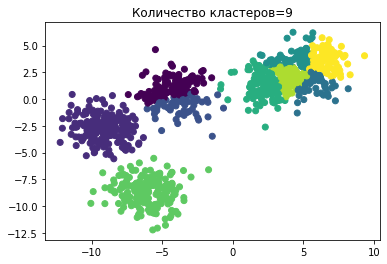

1 итерация


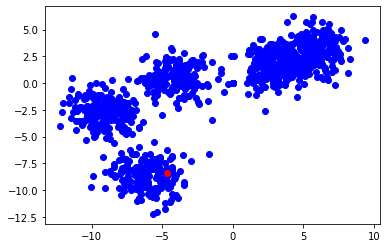

1 итерация


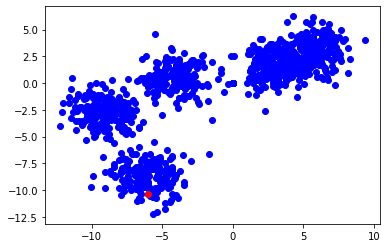

1 итерация


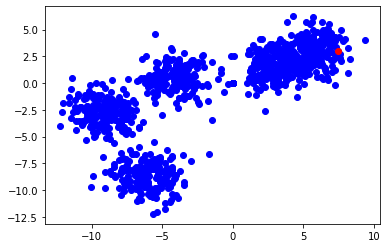

1 итерация


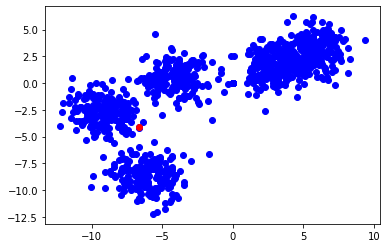

1 итерация


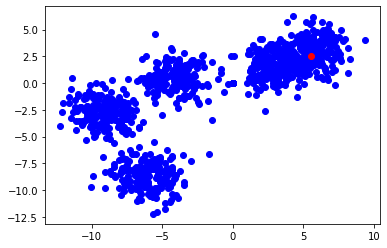

1 итерация


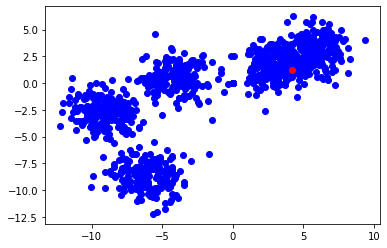

1 итерация


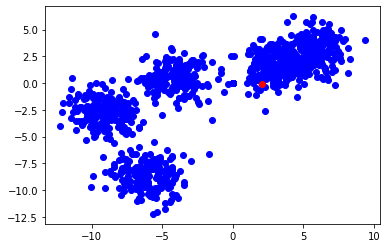

1 итерация


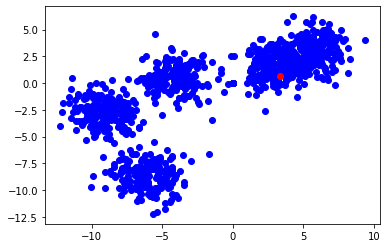

1 итерация


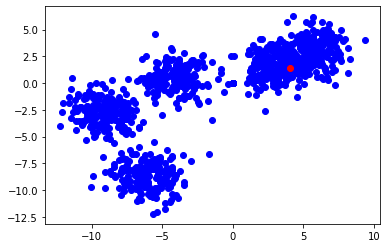

1 итерация


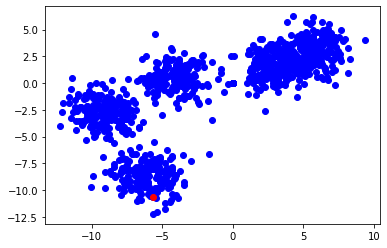

2 итерация


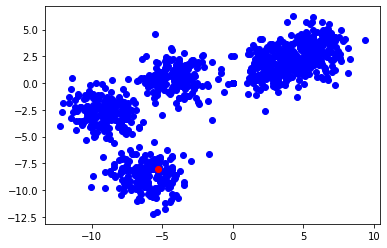

2 итерация


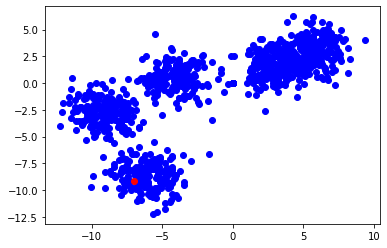

2 итерация


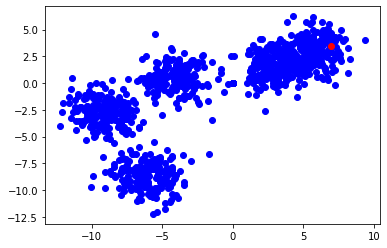

2 итерация


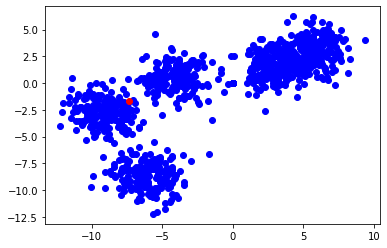

2 итерация


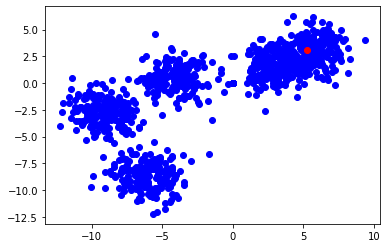

2 итерация


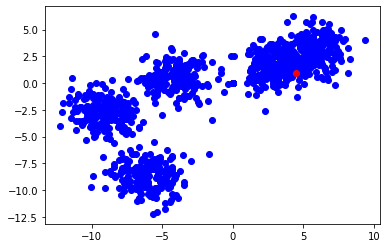

2 итерация


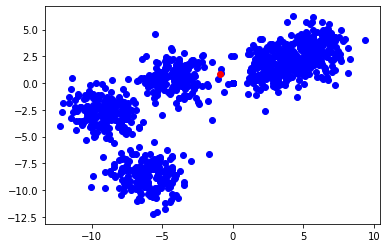

2 итерация


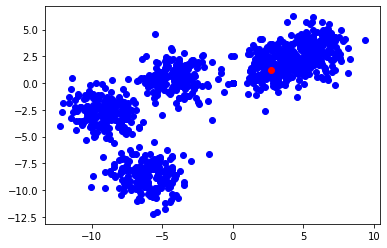

2 итерация


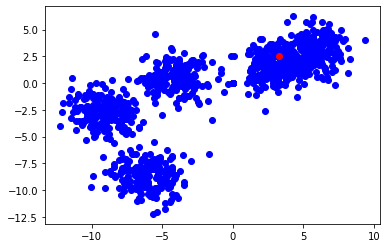

2 итерация


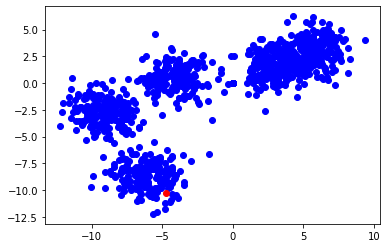

3 итерация


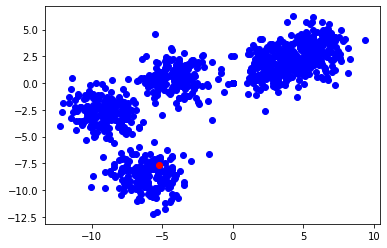

3 итерация


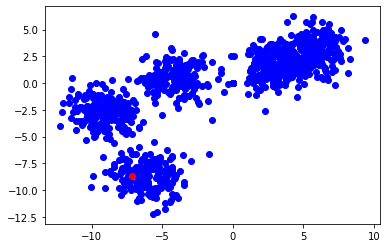

3 итерация


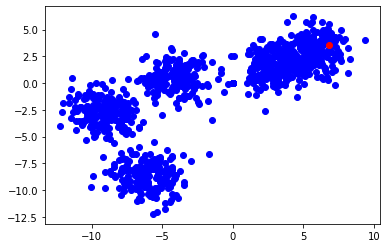

3 итерация


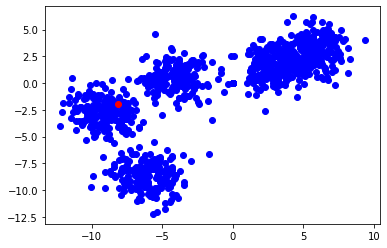

3 итерация


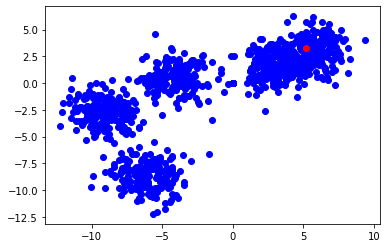

3 итерация


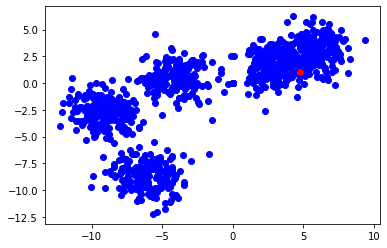

3 итерация


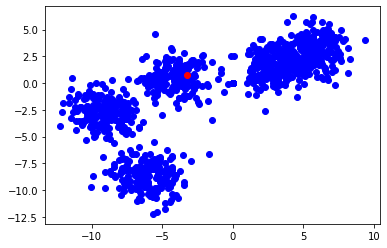

3 итерация


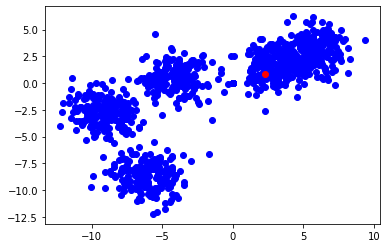

3 итерация


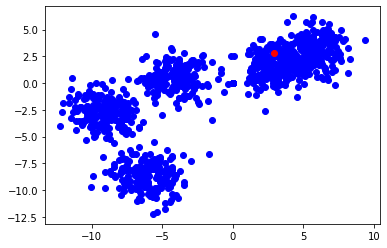

3 итерация


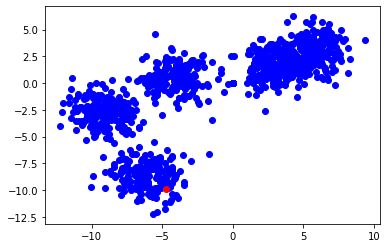

4 итерация


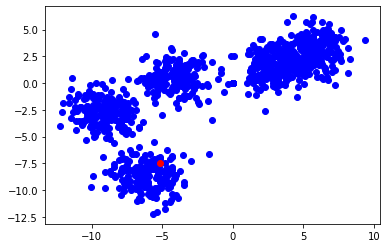

4 итерация


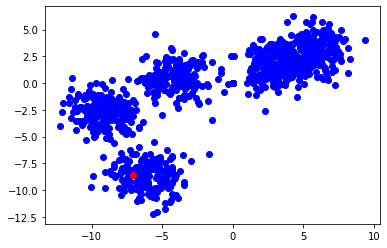

4 итерация


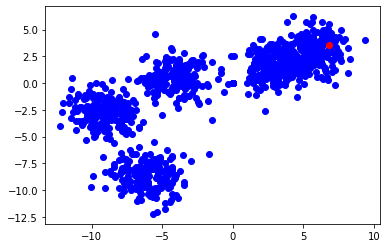

4 итерация


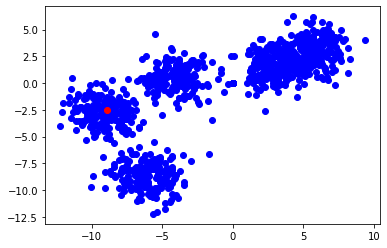

4 итерация


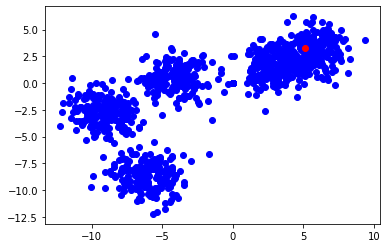

4 итерация


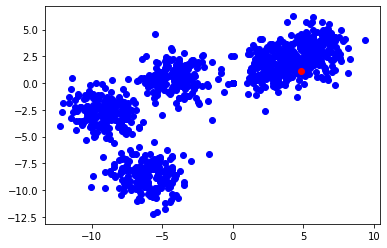

4 итерация


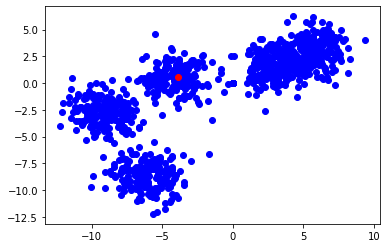

4 итерация


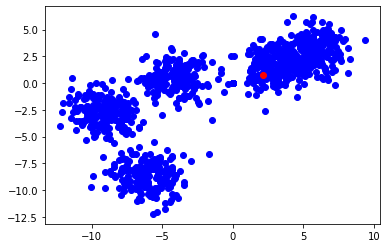

4 итерация


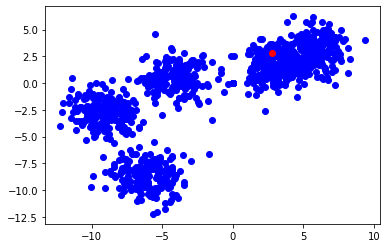

4 итерация


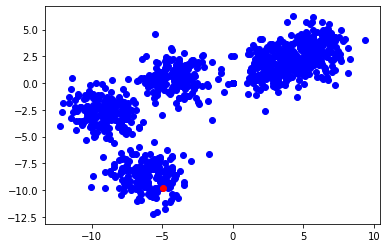

5 итерация


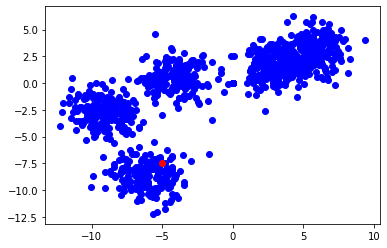

5 итерация


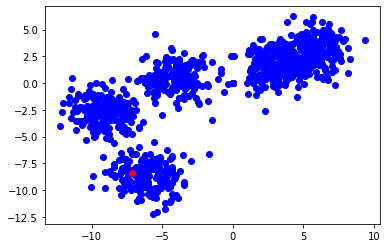

5 итерация


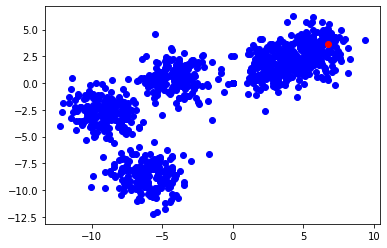

5 итерация


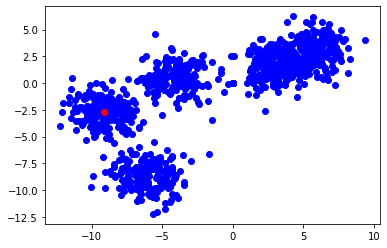

5 итерация


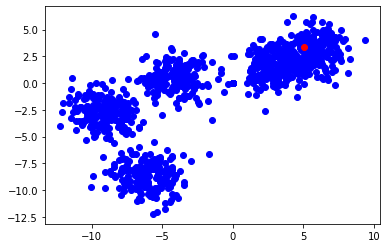

5 итерация


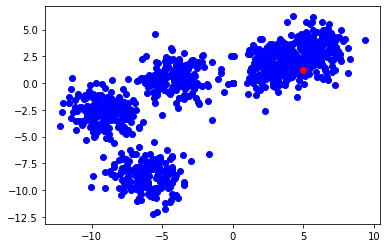

5 итерация


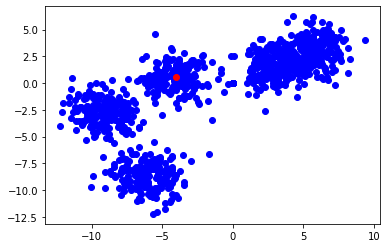

5 итерация


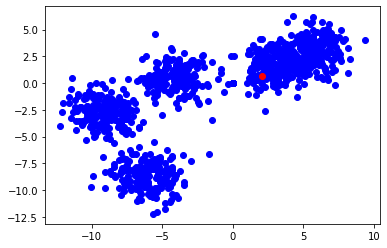

5 итерация


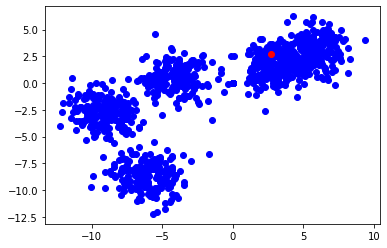

5 итерация


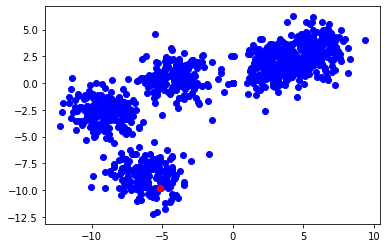

6 итерация


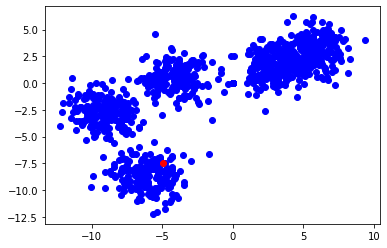

6 итерация


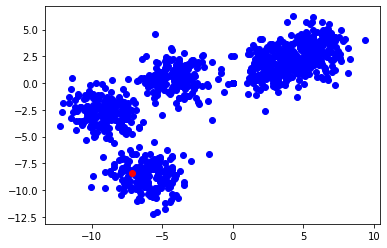

6 итерация


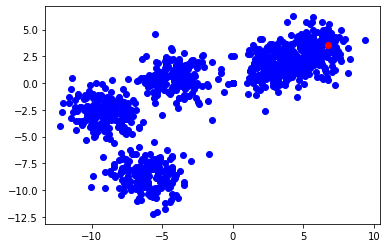

6 итерация


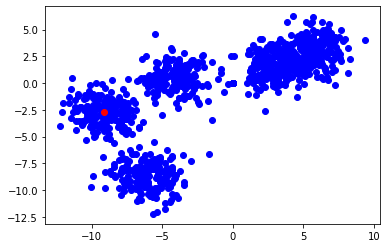

6 итерация


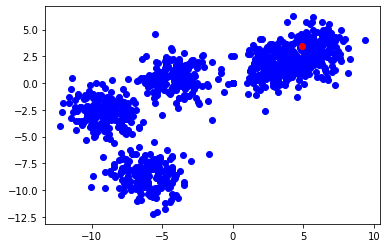

6 итерация


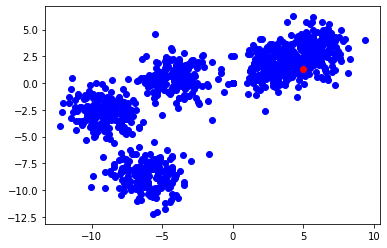

6 итерация


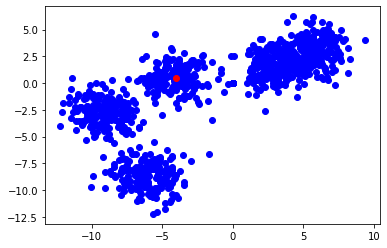

6 итерация


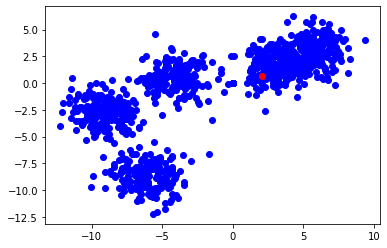

6 итерация


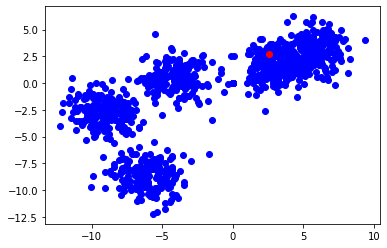

6 итерация


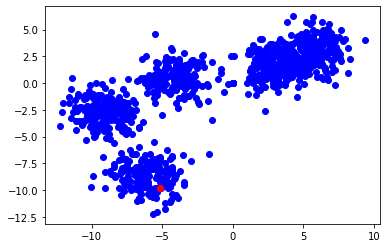

7 итерация


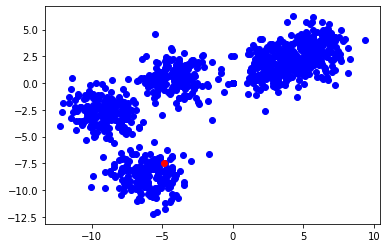

7 итерация


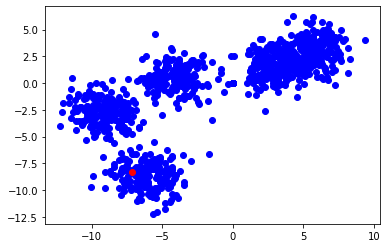

7 итерация


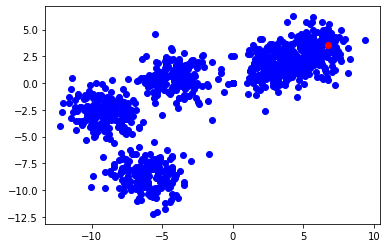

7 итерация


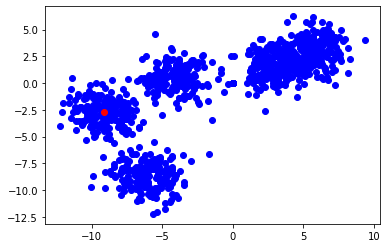

7 итерация


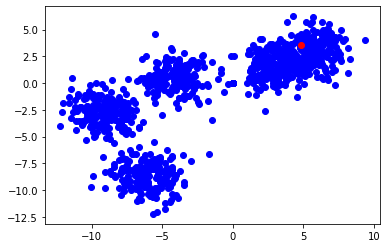

7 итерация


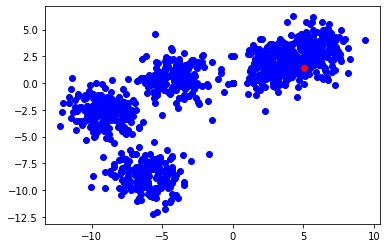

7 итерация


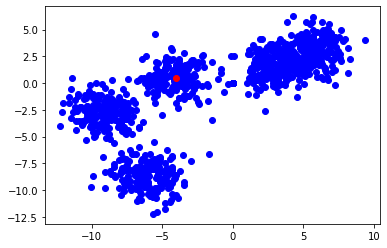

7 итерация


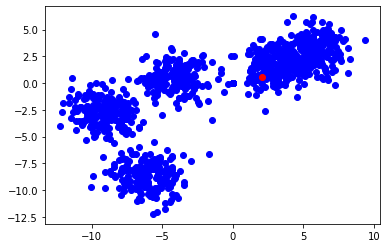

7 итерация


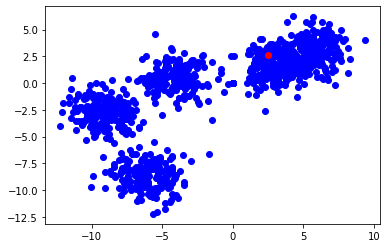

7 итерация


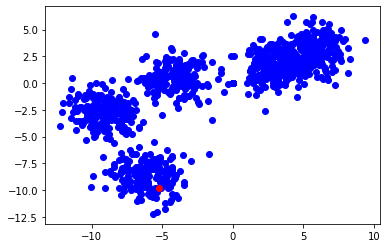

SSE= 14018.953928599447


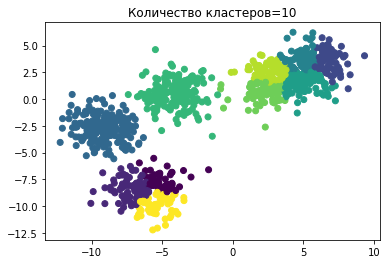

In [ ]:
C=[]
K=list(range(1, 11))
plt.figure(figsize=(12,12))
SSE=[]
for kol in K:
  sse, centroids=km(X,kol,0.05)
  SSE.append(sse)
  print("SSE=",sse)
  plt.scatter(X[:, 0] , X[: , 1],c=centroids)
  plt.title('Количество кластеров=%i' %kol)
  plt.show()

Оценка SSE (реализована в коде функции), ниже представлен график зависимости этой оценки от количества кластеров.
$$ SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2 $$

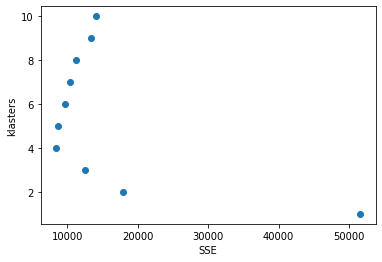

In [ ]:
plt.scatter(SSE,K)
plt.xlabel('SSE')
plt.ylabel('klasters')
plt.show()

Задание 2  
Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)  
Кластеризуйте данные с помощью KMeans из sklearn.clustering. Найдите оптимальное число кластеров  
Произведите анализ получившихся кластеров:  
Пример: первый кластер содержит полноприводные автомобили немецкого производства с АКПП, небольшим пробегом и высокой стоимостью, второй - японцы с правым рулём ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive 
drive.mount('/content/gdrive')

df_f = pd.read_csv('gdrive/MyDrive/2.csv', encoding='cp1251')
df = df_f.drop(columns=['Модель', 'Цвет'])
df.head()

Mounted at /content/gdrive


Марка     Год Состояние  ...   Руль  Хозяев в ПТС      Цена
0  Volkswagen  2013.0        БУ  ...  левый    1 владелец  689196.0
1       Skoda  2012.0        БУ  ...  левый    1 владелец  639196.0
2     Renault  2015.0        БУ  ...  левый    1 владелец  629196.0
3      Nissan  2012.0        БУ  ...  левый    1 владелец  479196.0
4         УАЗ  2014.0        БУ  ...  левый    1 владелец  599196.0

[5 rows x 13 columns]

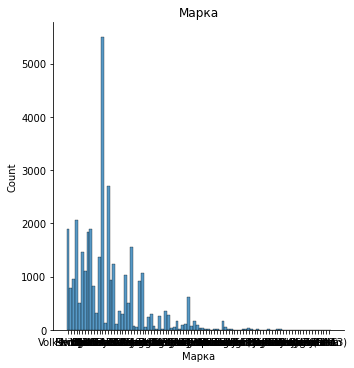

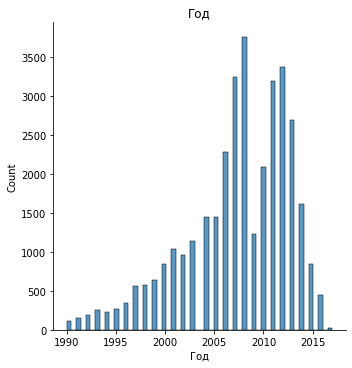

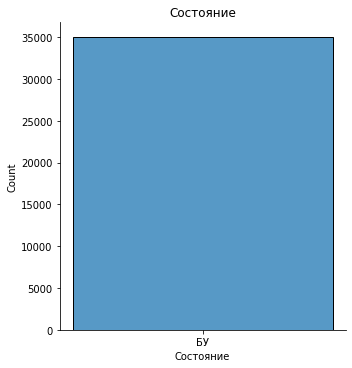

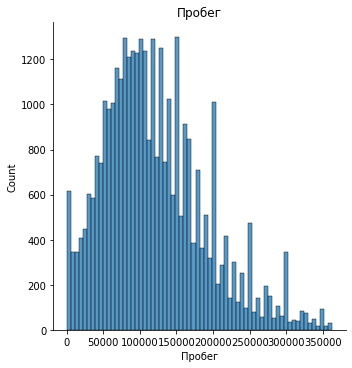

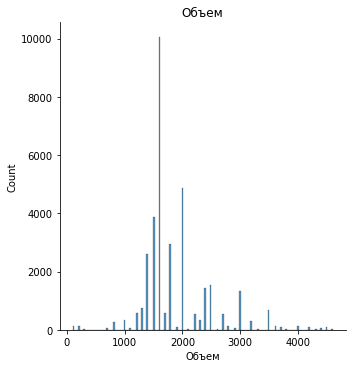

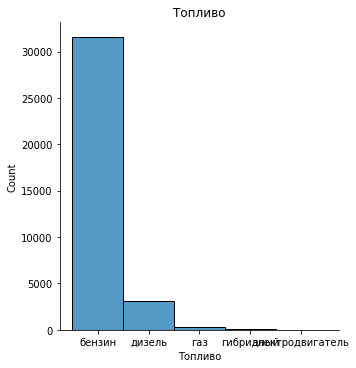

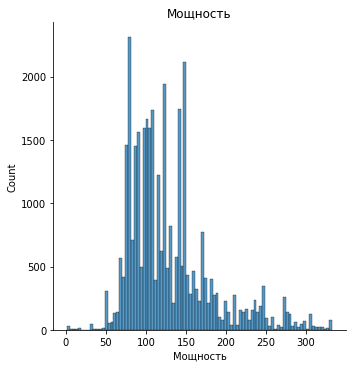

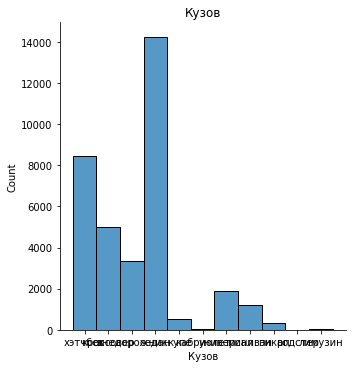

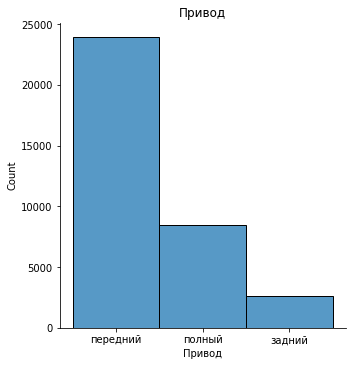

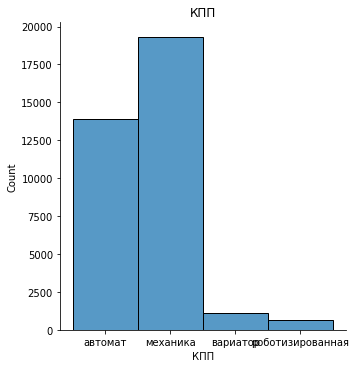

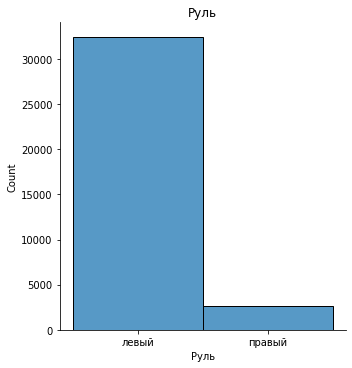

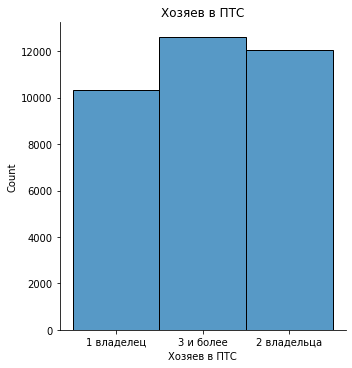

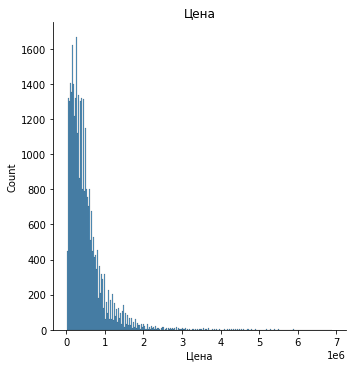

In [ ]:
for col in df.columns:
  sns.displot(df[col])
  plt.title(col)

In [2]:
#стандартизация
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() 
new_df=df
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']]) 
new_df.head()

Марка       Год Состояние  ...   Руль  Хозяев в ПТС      Цена
0  Volkswagen  1.055883        БУ  ...  левый    1 владелец  0.420103
1       Skoda  0.868335        БУ  ...  левый    1 владелец  0.315187
2     Renault  1.430978        БУ  ...  левый    1 владелец  0.294203
3      Nissan  0.868335        БУ  ...  левый    1 владелец -0.020546
4         УАЗ  1.243431        БУ  ...  левый    1 владелец  0.231254

[5 rows x 13 columns]

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lb=LabelEncoder()
new_df[['Марка','Состояние','Топливо', 'Кузов','Привод','КПП','Руль', 'Хозяев в ПТС']]=new_df[['Марка','Состояние','Топливо', 'Кузов','Привод','КПП','Руль', 'Хозяев в ПТС']].apply(lb.fit_transform)
new_df.head()

Марка       Год  Состояние    Пробег  ...  КПП  Руль  Хозяев в ПТС      Цена
0     77  1.055883          0 -1.129295  ...    0     0             0  0.420103
1     69  0.868335          0 -0.842782  ...    2     0             0  0.315187
2     61  1.430978          0 -1.663641  ...    2     0             0  0.294203
3     54  0.868335          0 -0.728177  ...    0     0             0 -0.020546
4     91  1.243431          0 -1.014690  ...    2     0             0  0.231254

[5 rows x 13 columns]

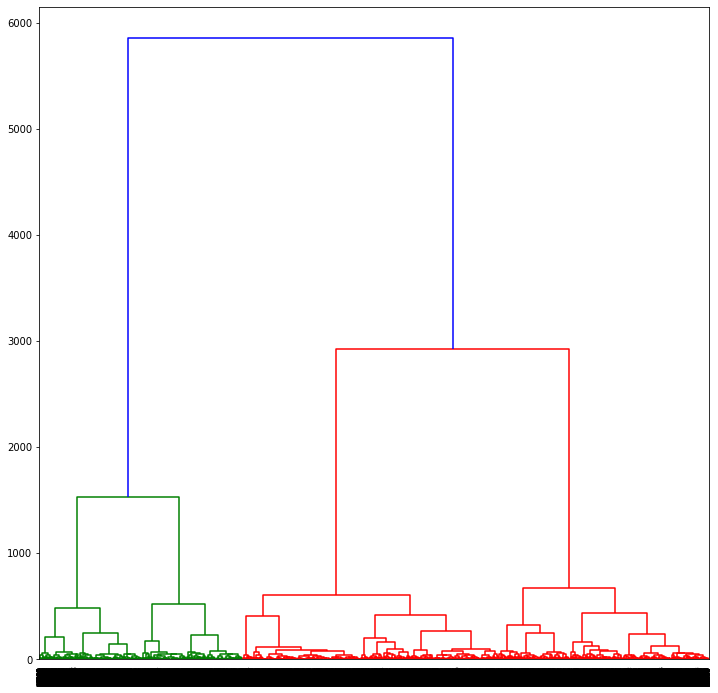

In [ ]:
#взяла иерархическую кластеризацию
from scipy.cluster.hierarchy import linkage,dendrogram
X=new_df
plt.figure(figsize=(12,12))
link=linkage(new_df, 'ward', 'euclidean')
dn=dendrogram(link,leaf_rotation=90,leaf_font_size=6)
plt.show()

Можно выделить 3 или 4 кластера, дальше уже идёт переобучение. Проанализируем разбиения на 3, 4 и 5 кластеров.

In [ ]:
from scipy.cluster.hierarchy import fcluster
new_df['cluster']=fcluster(link,3,criterion='maxclust')
new_df.groupby('cluster').mean()

Марка       Год  Состояние  ...      Руль  Хозяев в ПТС      Цена
cluster                                  ...                                  
1        18.388325  0.129657        0.0  ...  0.039481      1.050761  0.029350
2        78.472150 -0.156290        0.0  ...  0.082619      1.101558 -0.193031
3        51.877028  0.065334        0.0  ...  0.096263      1.034184  0.207522

[3 rows x 13 columns]

In [ ]:
new_df['cluster']=fcluster(link,4,criterion='maxclust')
new_df.groupby('cluster').mean()

Марка       Год  Состояние  ...      Руль  Хозяев в ПТС      Цена
cluster                                  ...                                  
1         8.064010  0.143711        0.0  ...  0.007748      1.038738  0.111951
2        29.116350  0.115053        0.0  ...  0.072455      1.063255 -0.056481
3        78.472150 -0.156290        0.0  ...  0.082619      1.101558 -0.193031
4        51.877028  0.065334        0.0  ...  0.096263      1.034184  0.207522

[4 rows x 13 columns]

In [ ]:
new_df['cluster']=fcluster(link,5,criterion='maxclust')
new_df.groupby('cluster').mean()

Марка       Год  Состояние  ...      Руль  Хозяев в ПТС      Цена
cluster                                  ...                                  
1         8.064010  0.143711        0.0  ...  0.007748      1.038738  0.111951
2        29.116350  0.115053        0.0  ...  0.072455      1.063255 -0.056481
3        78.472150 -0.156290        0.0  ...  0.082619      1.101558 -0.193031
4        45.550000  0.156557        0.0  ...  0.050802      1.011497  0.442294
5        55.149931  0.018145        0.0  ...  0.119779      1.045920  0.086077

[5 rows x 13 columns]

Заметно, что 4 и 5 кластеры имеют очень близкие значения, поэтому я предположу, что максимальное число разбиений равно 4. По нему и проанализируем данные.  
Состояние всех автомобилей Б/У, поэтому этот параметр не учитываем. Ещё сразу обартим внимание на близкие значения кластеров в параметрах "Топливо", "Хозяев в ПТС" и "Привод", поэтому сразу сделаем вывод, что автомобили выбрались переднеприводные, ездящие на бензине и с двумя хозяева в ПТС. В первом кластере достаточо новые немецкие автомобили со средним пробегом, средним объёмом двигателя, но мощные, стоимостью около 400000. Во втором кластере праворукие японские и китайские автомобили типа родстер года 2008-2011 со средним пробегом в 120000, имеют тип КПП-вариатор, по цене близкой к 350000. Третий кластер с леворульными шведскими автомобилями (преимуществено Volvo) года 2007 с небольшим объёмом двигателя, соответственно, не такие мощные, с типом кузова седан или родстер, по цене около 400000. В четвёртом кластере собрали автомобили марки Mini года 2002, с достаточно большим пробегом и ценой.

In [21]:
#num=[[8.064010,	0.143711,	-0.036948,	0.049171,	0.236857,	0.219883,	6.733813,	1.163623,	1.125254,	0.007748,	1.038738,	0.11195],
#    [29.116350,	0.115053,	-0.004133,	-0.050056,	0.237493,	0.025891,	7.041595,	1.146636,	1.185164,	0.072455,	1.063255,	-0.056481],
#    [78.472150,	-0.156290, -0.017709,	-0.111395,	0.238163,	-0.270839,	6.928790,	1.160540,	1.412124,	0.082619,	1.101558,	-0.193031],
#    [51.877028,	0.065334,	0.041874,	0.135689,	0.361896,	0.210134,	6.284503,	1.188788,	0.958341,	0.096263,	1.034184,	0.207522]]
num= [51.877028,	0.065334,	0.041874,	0.135689,	0.361896,	0.210134,	6.284503,	1.188788,	0.958341,	0.096263,	1.034184,	0.207522]
parameter=['Марка','Год',	'Пробег',	'Объем',	'Топливо',	'Мощность',	'Кузов',	'Привод',	'КПП',	'Руль',	'Хозяев в ПТС',	'Цена']
k=0
n=parameter[k]
for i in enumerate(new_df[n]):
  if num[k]<0:
    if (i[1]<=(num[k]+0.2)) and (i[1]>=(num[k]-0.2)):
      print(i)
  else: 
    if (i[1]<=(num[k]+0.2)) and (i[1]>=(num[k]-0.2)):
      print(i)

(694, 52)
(2669, 52)
(3029, 52)
(5347, 52)
(9911, 52)
(10999, 52)
(12197, 52)
(14528, 52)
(22217, 52)
(24147, 52)
(26200, 52)
(27008, 52)
(27341, 52)
(27523, 52)
(27926, 52)
(29943, 52)
(32181, 52)
(33902, 52)


Количество кластеров:  1


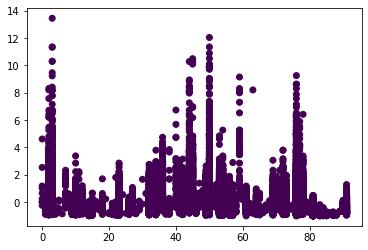

Количество кластеров:  2


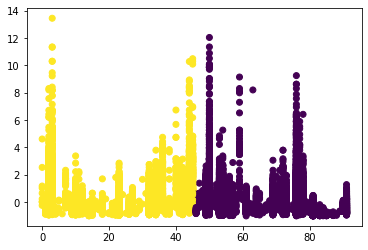

Количество кластеров:  3


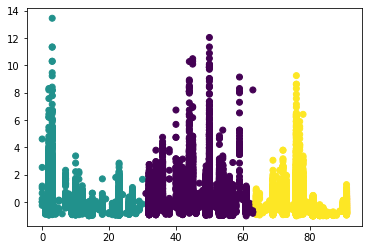

Количество кластеров:  4


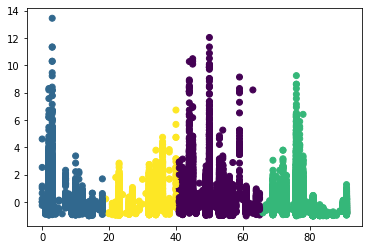

Количество кластеров:  5


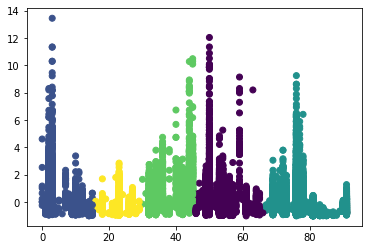

Количество кластеров:  6


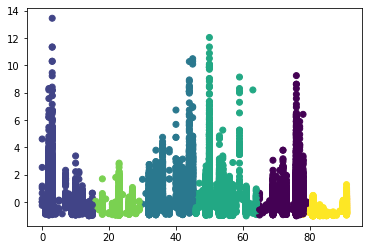

Количество кластеров:  7


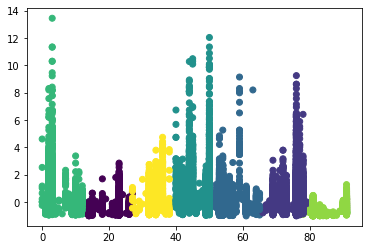

Количество кластеров:  8


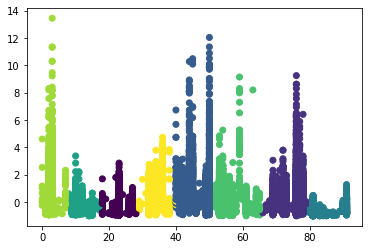

Количество кластеров:  9


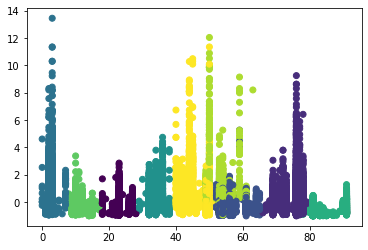

Количество кластеров:  10


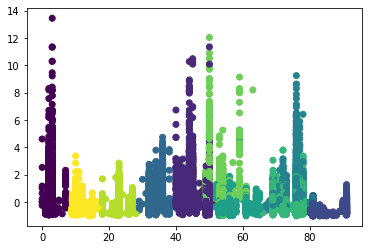

In [31]:
from sklearn.cluster import KMeans
K=list(range(1, 11))
for k in K:
  print("Количество кластеров: ",k)
  km = KMeans(n_clusters=k, random_state=0)
  clusters = km.fit_predict(new_df)
  plt.scatter(x=new_df['Марка'],y=new_df['Цена'],c=clusters)
  plt.show()

Выведем кластеры при помощи scatter по  данным из столбцов "Марка" и "Цена". Графии показали, что при коичестве кластеров больше 8 идёт наложение данных друг на друга, что показывает переобучение модели.